In [336]:
#This notebook is intended for automatic analysis of simulation and fit data from geiv


In [337]:
#important libraries and modules
import datetime
import math
import sys
import os
import re
import time
import numpy
import array
from matplotlib import pyplot
from pathlib import Path

In [338]:

import ROOT

In [339]:
from tqdm import tqdm

In [340]:
#programs written by Dr. MacLellan

from   printVal   import printVal


from printVal      import printVal
from getA          import getA
from readGDF       import readGDF
from getRatioError import getRatioError
from ra226BR       import *

In [341]:
pyplot.rcParams["figure.figsize"]=[12,8]
pyplot.rcParams["figure.dpi"]=200

# DATA AND SIMULATIONS DIR

In [342]:
sim_path=Path('/home/thakur/lccfiles')                                  #stores sim.gdf, .mac, bgrates.dat

geiv_data_path=Path('/home/thakur/geivanalysis/cornercorner_data_fit_gdfs')  #data collected from geiv and corresponding fitting gdfs
nugdf_path=Path('/home/thakur/mylab/ryanfiles/nugdf') #always remains same

number_of_sim_files=25

#dest_dir='my_test'

print(f'sim_root exists  : {sim_path.exists()}')
print(f'data_dir exists  : {geiv_data_path.exists()}')
print(f'nugdf_dir exists : {nugdf_path.exists()}')


sim_root exists  : True
data_dir exists  : True
nugdf_dir exists : True


In [343]:
position='cornercorner'
isotopes=['am241','pb210','ra226']
sim_dir_names=sorted([x for x in sim_path.iterdir() if x.is_dir() and f'{position}' in x.stem])
sim_dir_names


[PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.01mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.025mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.05mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.1mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.2mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.3mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.5mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side0.7mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.0mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.25mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.2mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.30mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.5mm')]

In [344]:
#index naming for better access
for c,i in enumerate(sim_dir_names):
    side=f"{i.name.split('_')[1]}"
    print(f"{c:>4}: {side:<15}{i}")

   0: side0.01mm     /home/thakur/lccfiles/cornercorner1122_side0.01mm
   1: side0.025mm    /home/thakur/lccfiles/cornercorner1122_side0.025mm
   2: side0.05mm     /home/thakur/lccfiles/cornercorner1122_side0.05mm
   3: side0.1mm      /home/thakur/lccfiles/cornercorner1122_side0.1mm
   4: side0.2mm      /home/thakur/lccfiles/cornercorner1122_side0.2mm
   5: side0.3mm      /home/thakur/lccfiles/cornercorner1122_side0.3mm
   6: side0.5mm      /home/thakur/lccfiles/cornercorner1122_side0.5mm
   7: side0.7mm      /home/thakur/lccfiles/cornercorner1122_side0.7mm
   8: side1.0mm      /home/thakur/lccfiles/cornercorner1122_side1.0mm
   9: side1.25mm     /home/thakur/lccfiles/cornercorner1122_side1.25mm
  10: side1.2mm      /home/thakur/lccfiles/cornercorner1122_side1.2mm
  11: side1.30mm     /home/thakur/lccfiles/cornercorner1122_side1.30mm
  12: side1.35mm     /home/thakur/lccfiles/cornercorner1122_side1.35mm
  13: side1.5mm      /home/thakur/lccfiles/cornercorner1122_side1.5mm


# <span style="color:red">CHOOSE  SIMULATION DIR HERE </span>

In [345]:
index=12
sim_dir=sim_dir_names[index]
sim_dir

PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm')

In [346]:
if sim_dir.is_dir():print(f"{sim_dir} exists !")

/home/thakur/lccfiles/cornercorner1122_side1.35mm exists !


In [347]:
mac_files=[x for x in sim_dir.iterdir() if x.suffix=='.mac']
mac_files

[PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm/ra226_cornercorner_0.mac'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm/pb210_cornercorner_0.mac'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm/am241_cornercorner_0.mac')]

In [348]:
am241_mac_file=[x for x in mac_files if 'am241' in x.name][0]
pb210_mac_file=[x for x in mac_files if 'pb210' in x.name][0]
ra226_mac_file=[x for x in mac_files if 'ra226' in x.name][0]

am241_mac_file,pb210_mac_file,ra226_mac_file

(PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm/am241_cornercorner_0.mac'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm/pb210_cornercorner_0.mac'),
 PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm/ra226_cornercorner_0.mac'))

In [349]:
sim_gdf_files=[x for x in sim_dir.iterdir() if 'sim.gdf' in x.name]

am241_sim_gdf=[x for x in sim_gdf_files if 'am241' in x.name]
pb210_sim_gdf=[x for x in sim_gdf_files if 'pb210' in x.name]
ra226_sim_gdf=[x for x in sim_gdf_files if 'ra226' in x.name]


am241_sim_gdf,pb210_sim_gdf,ra226_sim_gdf

([PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm/am241sim.gdf')],
 [PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm/pb210sim.gdf')],
 [PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm/ra226sim.gdf')])

# <span style="color:green"> DATA AND GDFS FROM GEIV DATA FITTING </span>

In [350]:
#contents of data dir
geiv_files=[x for x in geiv_data_path.iterdir() if x.is_file()]
geiv_data_files=[x for x in geiv_files if x.suffix=='.dat']
geiv_gdf_files=[x for x in geiv_files if x.suffix=='.gdf']
geiv_gdf_files


[PosixPath('/home/thakur/geivanalysis/cornercorner_data_fit_gdfs/am241.gdf'),
 PosixPath('/home/thakur/geivanalysis/cornercorner_data_fit_gdfs/pb210.gdf'),
 PosixPath('/home/thakur/geivanalysis/cornercorner_data_fit_gdfs/ra226.gdf')]

In [351]:
# data related .dat and .gdf
am241_geiv_data_file=[x for x in geiv_data_files if x.stem=='am241'][0]
am241_data_gdf=[x for x in geiv_gdf_files if x.stem=='am241'][0]
pb210_geiv_data_file=[x for x in geiv_data_files if x.stem=='pb210'][0]
pb210_data_gdf=[x for x in geiv_gdf_files if x.stem=='pb210'][0]
ra226_geiv_data_file=[x for x in geiv_data_files if x.stem=='ra226'][0]
ra226_data_gdf=[x for x in geiv_gdf_files if x.stem=='ra226'][0]

am241_geiv_data_file,am241_data_gdf,pb210_geiv_data_file,pb210_data_gdf,ra226_geiv_data_file,ra226_data_gdf

(PosixPath('/home/thakur/geivanalysis/cornercorner_data_fit_gdfs/am241.dat'),
 PosixPath('/home/thakur/geivanalysis/cornercorner_data_fit_gdfs/am241.gdf'),
 PosixPath('/home/thakur/geivanalysis/cornercorner_data_fit_gdfs/pb210.dat'),
 PosixPath('/home/thakur/geivanalysis/cornercorner_data_fit_gdfs/pb210.gdf'),
 PosixPath('/home/thakur/geivanalysis/cornercorner_data_fit_gdfs/ra226.dat'),
 PosixPath('/home/thakur/geivanalysis/cornercorner_data_fit_gdfs/ra226.gdf'))

# <span style="color:blue"> NUGDF (ALWAYS SAME) </span>

In [352]:

nugdf_files=[x for x in nugdf_path.iterdir()]
nugdf_files

[PosixPath('/home/thakur/mylab/ryanfiles/nugdf/am241.gdf'),
 PosixPath('/home/thakur/mylab/ryanfiles/nugdf/eu152.gdf'),
 PosixPath('/home/thakur/mylab/ryanfiles/nugdf/ba133.gdf'),
 PosixPath('/home/thakur/mylab/ryanfiles/nugdf/cs137.gdf'),
 PosixPath('/home/thakur/mylab/ryanfiles/nugdf/co60.gdf'),
 PosixPath('/home/thakur/mylab/ryanfiles/nugdf/pb210.gdf'),
 PosixPath('/home/thakur/mylab/ryanfiles/nugdf/na22.gdf'),
 PosixPath('/home/thakur/mylab/ryanfiles/nugdf/nugdf.txt'),
 PosixPath('/home/thakur/mylab/ryanfiles/nugdf/ra226.gdf')]

In [353]:
am241_nugdf=[x for x in nugdf_files if x.stem=='am241'][0]
pb210_nugdf=[x for x in nugdf_files if x.stem=='pb210'][0]
ra226_nugdf=[x for x in nugdf_files if x.stem=='ra226'][0]

am241_nugdf,pb210_nugdf,ra226_nugdf


(PosixPath('/home/thakur/mylab/ryanfiles/nugdf/am241.gdf'),
 PosixPath('/home/thakur/mylab/ryanfiles/nugdf/pb210.gdf'),
 PosixPath('/home/thakur/mylab/ryanfiles/nugdf/ra226.gdf'))

In [354]:
pos_text=f'{sim_dir.name}'
pos_text

'cornercorner1122_side1.35mm'

In [355]:
# #directory where fitted data and simulated data files, corresponding gdfs are stored
# total_simulation='25M'
# side_dead_layer='1mm'              #note this is also used in the saving or naming

# position='cornercorner'

# isotopes=['am241','pb210','ra226'] #isotopes in simulation

# root_path=f'/home/thakur/geivanalysis'

# source_dir=f'cornercorner1122_side1'      #where fit gdfs are stored
# nugdf_path='/home/thakur/mylab/ryanfiles/nugdf'  #always remains same

# data_fit_gdf='/home/thakur/geivanalysis/cornercorner_data_fit_gdfs' #data from geiv and corresponding gdfs are here...heading of data is requried to find the time fino


# data_suffix=f'_{position}{side_dead_layer}_{total_simulation}'



# dest_dir=f'results_{position}_side{side_dead_layer}'  #Where to save the results


# dest_path=f'{root_path}/{dest_dir}'

# print(f'destination_dir: {dest_dir}')

In [356]:
# mac_suffix=f'_{position}_0.mac' #at simulation files dir
# mac_suffix

In [357]:
#check if direcotry
# source_path=os.path.join(root_path,source_dir)


# if os.path.isdir(source_path):
#     print(f"{source_path} .. proceeding ...")
# else:
#     print(f"{source_path}...doesn't exeed ... !")

In [358]:
sim_dir

PosixPath('/home/thakur/lccfiles/cornercorner1122_side1.35mm')

In [359]:
#checking the *.dat inside source path
! ls -lt "{sim_dir}" | grep '.dat$'

-rw-rw-r-- 1 thakur thakur   7371 Nov 23 19:57 sim_cornercorner1122_side1.35mm.dat
-rw-rw-r-- 1 thakur thakur   8827 Nov 23 19:57 data_cornercorner1122_side1.35mm.dat
-rw-rw-r-- 1 thakur thakur  11596 Nov 23 19:53 ra226_cornercorner_side1.35mm_bgrates.dat
-rw-rw-r-- 1 thakur thakur    374 Nov 23 19:49 pb210_cornercorner_side1.35mm_bgrates.dat
-rw-rw-r-- 1 thakur thakur    555 Nov 23 19:48 am241_cornercorner_side1.35mm_bgrates.dat
-rw-rw-r-- 1 thakur thakur 442346 Nov 23 19:45 ra2269sim.dat
-rw-rw-r-- 1 thakur thakur 130060 Nov 23 19:45 ra226sim.dat
-rw-rw-r-- 1 thakur thakur 442346 Nov 23 19:45 ra2268sim.dat
-rw-rw-r-- 1 thakur thakur 442346 Nov 23 19:45 ra2267sim.dat
-rw-rw-r-- 1 thakur thakur 442346 Nov 23 19:45 ra2266sim.dat
-rw-rw-r-- 1 thakur thakur 442346 Nov 23 19:45 ra2265sim.dat
-rw-rw-r-- 1 thakur thakur 442346 Nov 23 19:45 ra2264sim.dat
-rw-rw-r-- 1 thakur thakur 442346 Nov 23 19:45 ra2263sim.dat
-rw-rw-r-- 1 thakur thakur 442346 Nov 23 19:45 ra2262sim.dat
-rw-rw-r-- 1 thaku

In [360]:
# checking the gdfs which were used to fit the data
! ls -lt "{geiv_data_path}"

total 1212
-rw-rw-r-- 1 thakur thakur 262589 Nov 17 18:27 pb210.dat
-rw-rw-r-- 1 thakur thakur 262589 Nov 17 18:27 ra226.dat
-rw-rw-r-- 1 thakur thakur 262589 Nov 17 18:27 am241.dat
-rw-rw-r-- 1 thakur thakur 144312 Nov 17 16:29 am241.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov 17 16:29 pb210.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov 17 16:29 ra226.gdf


In [361]:
#sim fit gdfs
! ls -lt "{sim_dir}/" | grep 'sim.gdf'

-rw-rw-r-- 1 thakur thakur 144312 Nov 23 19:53 ra226sim.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov 23 19:49 pb210sim.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov 23 19:47 am241sim.gdf


In [362]:
#checking *.mac inside source path
! ls -lt "{sim_dir}" | grep '.mac'

-rw-rw-r-- 1 thakur thakur   1111 Nov 23 19:45 ra226_cornercorner_0.mac
-rw-rw-r-- 1 thakur thakur   1152 Nov 23 19:45 pb210_cornercorner_0.mac
-rw-rw-r-- 1 thakur thakur   1152 Nov 23 19:45 am241_cornercorner_0.mac


In [363]:
#checking *.gdf inside source path
#! ls -lt "{source_path}" | grep -E '[0-9][0-9][0-9](sim)?.gdf'


In [364]:
#! ls -lt "{source_path}" | grep -E '[A-Za-z]+[0-9][0-9][0-9](sim)?.gdf'


In [365]:

# #checking if the destination dir exists otherwise creating it
# dest_path=os.path.join(root_path,dest_dir)

# if os.path.isdir(dest_path):
#     print(f"{dest_path} .. proceeding ...")
# else:
#     print(f"{dest_path}...doesn't exist ... creating it !")
#     os.mkdir(f'{dest_path}')

# READ DATA FILE

In [366]:
def getRunTimes(datFile):
    """
    reads the 3rd and 4th line of the data file which is obtained from Chn files and returns start and end time
    The form of lines which getRunTimes reads:
    Run started....................:  Fri Feb 14 10:22:43 2020
       in time zone.................:  CST
       in time since epoch..........:  1581697363 s
     Run  time......................:         251.90 s
     Live time......................:         251.52 s
     Number of data channels........:       16384
    """
    print(f"Reading the file: {datFile}\n")
    command=f'head {datFile}'
    print(f'head of {datFile}')
    os.system(command)
    #print('head of {datFile}\n{os.system(command)}\n')
    file = open(datFile, 'r')
    lines = file.readlines()
    #readline reads a whole file in a go and store in the form of list of strings.
    start =           int(lines[2].split()[-2])
    end   = start + float(lines[3].split()[-2])
    print(f"\nstart time: {start}")
    print(f"end time  : {end}\n")
    return [start, end]


def check_file(f):
    #check if file exist exit otherwise
    if os.path.isfile:
        print(f'file: {f} exists ... processing ...\n')
    else:
        print(f'file: {f} doesnot exist ... exiting  ...\n')
        sys.exit(1)


In [367]:

geiv_data_file="data.dat"       #combined combined data is saved in this file
geiv_sim_file='sim.dat'         #combined simulation are collected here
geiv_corr_file='correction.dat' #combined correction data are collected here
geiv_source_corr_file='source_correction.dat' #source correction for plotcorrection

# def getRunTimes(datFile):
#     """
#     reads the 3rd and 4th line of the data file which is obtained from Chn files and returns start and end time
#     """
#     print(f"Reading the file: {datFile}")
#     file = open(datFile, 'r')
#     lines = file.readlines()
#     #readline reads a whole file in a go and store in the form of list of strings.
#     start =           int(lines[2].split()[-2])
#     end   = start + float(lines[3].split()[-2])
#     print(f"start time: {start}\n")
#     print(f"end time  : {end}\n")
#     return [start, end]




#epoch->Jan 01,1970 (also called unix time, posix time)


#Example input:
#./data.py co60 ~/ge4/ana/2020/effcal/02-14/door/dat/co60.dat co60.gdf ~/ge4/gdf/co60/co60.gdf

def create_data_file(parent,datFile,gdfFile,gdfFile0):
    
    """
        It results a single data file for a given isotopes
        parenet:ne of isotopes
        datFile:data file obtained from the conversion of Chn to dat with chn2dat function. It is for start and end time
        gdfFile:It is file which is fits the given data file with convergence of 3
        gdfFile0:original gdf file produced from nudat2
    """
    # parent   = sys.argv[1]
    # datFile  = sys.argv[2] #data file obtained for the corresponding Chn file->gives start and end time
    # gdfFile  = sys.argv[3] #gdf file which best fits the data file
    # gdfFile0 = sys.argv[4] #original gdf file 

    [start, end] = getRunTimes(datFile) #start,end time

    [A, dA, minus, plus] = getA(parent,
                                  datetime.datetime.fromtimestamp(start, datetime.timezone.utc),
                                  datetime.datetime.fromtimestamp(end,   datetime.timezone.utc) )

    #datetime.fromtimestamp(ts) converts "seconds since the epoch" to a naive datetime object that represents local time. tzinfo is always None in this case.
    #getA is getting activities based on the source certificates and start and end time

    isotopes = [[ parent, 1 ]]
    if   parent == 'eu152' or parent == 'Eu152' or parent == 'Eu-152':
        isotopes = [
            ['eu152b', 27.92e-2, 13e-4 ],
            ['eu152e', 72.08e-2, 13e-4 ]
        ]
    elif parent == 'ra226' or parent == 'Ra226' or parent == 'Ra-226':
        isotopes = [
            [ 'ra226', 1 ],
            [ 'pb214', pb214br ],
            [ 'bi214', bi214br ],
            [ 'pb210', pb210br ]
        ]

    # Read all gamma-ray data for this source.
    [livetime, data]  = readGDF( gdfFile,  isotopes )
    # Need to get B.R. error from original gdf file. gdfit sets it to sqrt(2).
    [livetime, data2] = readGDF( gdfFile0, isotopes )
    for d in data:
        for d2 in data2:
            if d2[0] == d[0]:
                d[2] = d2[2]
                break
        if d[2] == 0:
            print( 'Warning:',d[0],'keV branching ratio has no error.' )

    print(f"\nOpening and reading the file: {geiv_data_file}\n")
    file = open(geiv_data_file,'a')
    for d in data:
        if d[4] > 0: # gamma line was fit
            if d[3]/d[4] >= 3: # number of sigma measurement
                print( '' )
                # Get observed source activity implied by activity of this transition and its B.R.
                print( 'Observed activity.....:', d[0], d[3]/d[1], d[4]/d[1], 'Bq' )# fit rate/B.R. of gamma
                print( '               or.....:', d[0], printVal(d[3]/d[1], d[4]/d[1]), 'Bq' )

                # Divide the observed activity by the source activity to get efficiency.
                eff = d[3]/d[1]/A
                lo  = d[4]/d[3] * eff
                hi  = lo
                #[lo, hi] = getRatioError(d[3]/d[1], d[4]/d[1], d[4]/d[1], A, 0, 0)
                #lo = eff - lo
                #hi = hi - eff
                # Print observed efficiency (observed activity/source activity).
                print( 'Observed efficiency...:', eff, '+', hi, '/-', lo    )
                print( '                 or...:', printVal(eff, (lo+hi)/2 ) )

                file.write( '{:6s} {:6s} {:.4f} {:e} {:e} {:e} {:e} {:e} {:e} {:e} {:e} {:e} {:e} {:e}\n'.format(parent,
                                                                                                                 d[-1], d[0],
                                                                                                                 eff, lo, hi,
                                                                                                                 A, dA, minus, plus,
                                                                                                                 d[1], d[2], d[3], d[4]) )
                #print("parent\t d[-1]d[0]\teff\tlo\thi\tA\tdA\tminus\tplus\n")
                #print("DATA FILE INFORMATION:\n")
                #print( 'parent->{:6s}\td[-1]-> {:6s}\td[0]-> {:.4f}\teff-> {:e}\tlo-> {:e}\thi-> {:e}\tA-> {:e}\tdA-> {:e}\tminus-> {:e}\tplus-> {:e}\t d[1]->{:e}\td[2]-> {:e}\td[3]-> {:e}\td[4]-> {:e}\n'.format(parent,
                                                                                                                 # d[-1], d[0],
                                                                                                                 # eff, lo, hi,
                                                                                                                 # A, dA, minus, plus,
                                                                                                                 # d[1], d[2], d[3], d[4]) )

    file.close()


#Example input:
#./sim.py co60 ~/gesim/sources/door/co60.mac co60sim.gdf ~/ge4/gdf/co60/co60.gdf

def create_sim_file(parent,macFile,gdfFile,gdfFile0,number_of_sim_files=number_of_sim_files):
    """
    creates a single simulation datafile
    parent:isotope
    macFile:macfile which stores simulation info
    gdfFile:gdfFile which fits simulation data
    gdfFile0: from nugdf
    """

    no_of_files=number_of_sim_files

    print(f"""
    parent      : {parent}
    macFile     : {macFile}
    gdfFile     : {gdfFile}
    dfFile0     : {gdfFile0}
    sim_files#  : {no_of_files}
    """)
    
    # Get number of simulated events from Geant4 mac file.
    file = open(macFile, "r")
    for line in file:
        # This should find the last line that begins with (not commented out) beamOn.
        if re.search('^/run/beamOn', line):
            N = int( line.split()[1] )
            print("N in a mac file:   {}".format(N))
            #changing N for given files
            print("Number of simulation files: {}".format(no_of_files))
            N=no_of_files*N
            print("N in a simulation: {}".format(N))
            print(f"or N: {N/1e6} M\n")

    isotopes = [[ parent, 1 ]]
    if   parent == 'eu152' or parent == 'Eu152' or parent == 'Eu-152':
        isotopes = [
            ['eu152b', 27.92e-2, 13e-4 ],
            ['eu152e', 72.08e-2, 13e-4 ]
        ]
    elif parent == 'ra226' or parent == 'Ra226' or parent == 'Ra-226':
        isotopes = [
            [ 'ra226', 1 ],
            [ 'pb214', pb214br ],
            [ 'bi214', bi214br ],
            [ 'pb210', pb210br ]
        ]

    # Read all gamma-ray data for this source.
    [livetime, data]  = readGDF( gdfFile, isotopes)
    # Need to get B.R. error from original gdf file. gdfit sets it to sqrt(2).
    [dummy,    data2] = readGDF( gdfFile0, isotopes )
    for d in data:
        for d2 in data2:
            if d2[0] == d[0]:
                d[2] = d2[2]
                break
        if d[2] == 0:
            print( 'Warning:',d[0],'keV branching ratio has no error.' )

    print("OPEANING and READING sim.dat")
    file = open(geiv_sim_file,'a')
    for d in data:
        if d[4] > 0: # gamma line was fit
            if d[3]/d[4] >= 3: # 3 sigma measurement
                eff = d[3]/d[1]*livetime/N
                lo  = d[4]/d[1]*livetime/N/eff
                lo  = math.sqrt( lo*lo + d[2]*d[2]/(d[1]*d[1]) )
                lo *= eff
                hi  = lo
                print( 'Number simulated......: ', N )
                print( "Simulated efficiency..:", eff, '+', hi, '/-', lo )
                print( "                  or..:", printVal(eff, (lo+hi/2)) )

                file.write( '{:6s} {:6s} {:.4f} {:e} {:e} {:e} {:d} {:e} {:e} {:e} {:e} {:e}\n'.format(parent,
                                                                                                 d[-1], d[0],
                                                                                                 eff, hi, lo,
                                                                                                 N, livetime,
                                                                                                 d[1], d[2], d[3], d[4]) )
                #print( 'parent->{:6s}\td[-1]-> {:6s}\td[0]-> {:.4f}\teff-> {:e}\thi-> {:e}\tlow-> {:e}\tN-> {:d}\tlivetime-> {:e}\td[1]-> {:e}\td[2]-> {:e}\td[3]-> {:e}\td[4]->{:e}\n'.format(parent,
                                                                                                 # d[-1], d[0],
                                                                                                 # eff, hi, lo,
                                                                                                 # N, livetime,
                                                                                                 # d[1], d[2], d[3], d[4]) )

    file.close()



def get_correction_data(parent,combined_data_file,combined_sim_file):
    """
    returns correction for given parent 
    parent: isotope
    combined_data_file: file which stores data for all the isotopes
    
    """
 
    print(f"""
    parent            : {parent}
    combined_data_file: {combined_data_file}
    combined_sim_file : {combined_sim_file}
    """)
    
    #check if file exist
    
    check_file(combined_data_file)
    check_file(combined_sim_file)


    skips = []
    file = open('skip.dat', 'r')
    for line in file:
        if line[0] == '#':
            continue
        print('skipping',line.split()[0:2])
        skips.append(line.split()[0:2])


    data = []
    #################################################################
    file = open(combined_data_file, 'r')             #remember the data file
    for line in file:
        words = line.split()
        if words[0] != parent:
            continue
        id = [ words[0],        # parent
               words[2] ]       # energy
        skip = False
        for s in skips:
            if id == s:
                skip = True
        if not skip:
            data.append([
                [ words[0],         # 0: parent
                  words[1] ],       # 0: daughter
                float(words[ 2]),   # 1: energy
                float(words[ 6]),   # 2: source activity (decayed)
                float(words[ 7]),   # 3: uncertainty in source activity
                float(words[ 8]),   # 4: total activity error (minus)
                float(words[ 9]),   # 5: total activity error (plus)
                float(words[10]),   # 6: branching ratio
                float(words[11]),   # 7: error
                float(words[12]),   # 8: rate
                float(words[13]) ]) # 9: error
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0] and data[e][1] == data[entry][1]:
                data.remove(data[e])
                break



    # Read all entries from sim.dat,
    # then remove earlier superseeded entries.
    sim = []

    print("simulated file name:\t",combined_sim_file)
    file = open(combined_sim_file, 'r')
    for line in file:
        words = line.split()
        if words[0] != parent:
            continue
        sim.append([
            [ words[0],         # 0: isotope
              words[1] ],       # 0: isotope
            float(words[ 2]),   # 1: energy
            int(  words[ 6]),   # 2: number generated
            float(words[ 7]),   # 3: livetime assumed by GDFit
            float(words[ 8]),   # 4: branching ratio
            float(words[ 9]),   # 5: error
            float(words[10]),   # 6: rate
            float(words[11]) ]) # 7: error
    for entry in reversed(range(len(sim))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if sim[e][0] == sim[entry][0] and sim[e][1] == sim[entry][1]:
                sim.remove(sim[e])
                break



    # Confirm each gamma-ray appears in both the data and simulation analysis.
    for s in reversed(range(len(sim))):
        found = False
        for d in range(len(data)):
            if data[d][0] == sim[s][0] and data[d][1] == sim[s][1]:
                found = True
                break
        if not found:
            print( 'Warning: '+sim[s][0][1],sim[s][1],'keV gamma-ray not found in data.')
            sim.remove(sim[s])

    for d in range(len(data)):
        found = False
        for s in range(len(sim)):
            if data[d][0] == sim[s][0] and data[d][1] == sim[s][1]:
                found = True
                data[d].append(sim[s])
                if (sim[s][4] != data[d][6] and sim[s][5] != data[d][7]):
                    print('Warning: '+sim[s][0][1],sim[s][1],'keV gamma-ray branching ratio/error differs.')
                break
        if not found:
            print( 'Error: '+data[d][0][1],data[d][1],'keV gamma-ray not found in simulation.')
            data.remove(data[d])
            exit(-1)

    print(20*"==")
    #print(f"Correction File: {corr_file}\n")
    file = open('correction.dat','a')
    for d in data:
        # Get the error on the ratio by simulation.
        A        = d[2]
        dA       = d[3]
        lo       = d[4]
        hi       = d[5]
        br       = d[6]
        ebr      = d[7]
        r        = d[8]
        er       = d[9]
        N        = d[-1][2]
        livetime = d[-1][3]
        s        = d[-1][6]
        es       = d[-1][7]
        num      = N/livetime*r
        enum     = N/livetime*er
        denom    = A*s
        # Branching ratio cancels in the data/simulation ratio.
        # But the simulation uses some branching ratio so add it to the
        # simulation 'rate' (in the denominator).
        edenom   = ebr*ebr/(br*br) + es*es/(s*s) # temporary value
        A2       = A*A
        [ minus1, plus1 ] = getRatioError( num, enum, enum,
                                           denom,
                                           denom*math.sqrt( lo*lo/A2 + edenom ),
                                           denom*math.sqrt( hi*hi/A2 + edenom ) )
        [ minus2, plus2 ] = getRatioError( num, enum, enum,
                                           denom,
                                           denom*math.sqrt(            edenom ),
                                           denom*math.sqrt(            edenom ) )
        c = num/denom
        print( 'Efficiency correction.:', c,
               '+',  plus1 - c,
               '/-', c - minus1 )
        print( '                   or.:', printVal( c, (plus1-minus1)/2 ) )

        file.write( '{:6s} {:6s} {:.4f} {:e} {:e} {:e} {:e} {:e} {:e} {:e}\n'.format(d[0][0], d[0][1], d[1], c, c-minus1, plus1-c, c-minus2, plus2-c, lo/A, hi/A) )
    file.close()


# SINGLE DATA RESULTS FILE 

In [368]:

for isotope in tqdm(isotopes):
    parent=isotope
    data_file=geiv_data_path / f"{isotope}.dat"
    gdf_file=geiv_data_path / f"{isotope}.gdf"
    gdf_file0=nugdf_path/ f"{isotope}.gdf"
    #data_file=f'{isotope}_geiv_data_file')#os.path.join(data_fit_gdf,f'{isotope}.dat')
#     gdf_file=f'{isotope}_data_gdf' #os.path.join(data_fit_gdf,f'{isotope}.gdf')
#     gdf_file0=f'{isotope}_nugdf'#os.path.join(nugdf_path,f'{isotope}.gdf')
    
    print(f'''
    parent   : {parent}
    parent   : {data_file}
    gdf_file : {gdf_file}
    gdf_file0: {gdf_file0}
''')
    #run file
    create_data_file(parent,data_file,gdf_file,gdf_file0)

  0%|                                                                                                             | 0/3 [00:00<?, ?it/s]


    parent   : am241
    parent   : /home/thakur/geivanalysis/cornercorner_data_fit_gdfs/am241.dat
    gdf_file : /home/thakur/geivanalysis/cornercorner_data_fit_gdfs/am241.gdf
    gdf_file0: /home/thakur/mylab/ryanfiles/nugdf/am241.gdf

Reading the file: /home/thakur/geivanalysis/cornercorner_data_fit_gdfs/am241.dat

head of /home/thakur/geivanalysis/cornercorner_data_fit_gdfs/am241.dat

start time: 1700682361
end time  : 1700683230.22

Start time of experiemntal data: 178098361.0
End time of experiemntal data: 178099230.22
Working for the id: am241



 33%|█████████████████████████████████▋                                                                   | 1/3 [00:03<00:07,  3.69s/it]

A->	 38450.48837223798
dA->	 576.7573255835697
Average source activity.......: 38450.48837223798 + 574.4111904245198 /- 579.2580555408382 Bq
                     or.......: 38450.48837223798 +/- 576.7573255835697 Bq
                     or.......: 38500 +/- 600	 Bq
Reading the gef file: /home/thakur/geivanalysis/cornercorner_data_fit_gdfs/am241.gdf to read the data!!!

norm: 8
parent: 1.0
lt: 868.5800170898
Reading the gef file: /home/thakur/mylab/ryanfiles/nugdf/am241.gdf to read the data!!!

norm: 8
lt: 973974.7

Opening and reading the file: data.dat


Observed activity.....: 59.5409 17.775760511777158 0.2521172479101114 Bq
               or.....: 59.5409 17.78 +/- 0.25	 Bq
Observed efficiency...: 0.00046230259391481776 + 6.556932267527324e-06 /- 6.556932267527324e-06
                 or...: 0.000462 +/- 0.000007	

    parent   : pb210
    parent   : /home/thakur/geivanalysis/cornercorner_data_fit_gdfs/pb210.dat
    gdf_file : /home/thakur/geivanalysis/cornercorner_data_fit_gdfs/pb2

 67%|███████████████████████████████████████████████████████████████████▎                                 | 2/3 [00:07<00:03,  3.62s/it]

A->	 182758.13444388716
dA->	 3655.162688877743
Average source activity.......: 182758.13444388716 + -3683.298544622058 /- -3656.0154556916978 Bq
                     or.......: 182758.13444388716 +/- 3655.162688877743 Bq
                     or.......: 182800 +/- 3700	 Bq
Reading the gef file: /home/thakur/geivanalysis/cornercorner_data_fit_gdfs/pb210.gdf to read the data!!!

norm: 5
parent: 1.0
lt: 440.6000061035
Reading the gef file: /home/thakur/mylab/ryanfiles/nugdf/pb210.gdf to read the data!!!

norm: 5
lt: 973974.7

Opening and reading the file: data.dat


Observed activity.....: 46.539 7.374682475837647 1.0406755095818823 Bq
               or.....: 46.539 7.4 +/- 1.0	 Bq
Observed efficiency...: 4.0352143549057294e-05 + 5.694277372378215e-06 /- 5.694277372378215e-06
                 or...: 0.000040 +/- 0.000006	

    parent   : ra226
    parent   : /home/thakur/geivanalysis/cornercorner_data_fit_gdfs/ra226.dat
    gdf_file : /home/thakur/geivanalysis/cornercorner_data_fit_gdfs/r

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.75s/it]


Opening and reading the file: data.dat


Observed activity.....: 186.211 179.42925483167582 5.347893440428571 Bq
               or.....: 186.211 179 +/- 5	 Bq
Observed efficiency...: 0.00605618792437046 + 0.00018050483297791563 /- 0.00018050483297791563
                 or...: 0.00606 +/- 0.00018	

Observed activity.....: 241.995 165.76928988360223 3.0361691239125634 Bq
               or.....: 241.995 165.8 +/- 3.0	 Bq
Observed efficiency...: 0.005595129805149855 + 0.00010247833220862052 /- 0.00010247833220862052
                 or...: 0.00560 +/- 0.00010	

Observed activity.....: 258.86 109.07271114129944 22.624304852749532 Bq
               or.....: 258.86 109 +/- 23	 Bq
Observed efficiency...: 0.0036814778989745383 + 0.0007636271018069745 /- 0.0007636271018069745
                 or...: 0.0037 +/- 0.0008	

Observed activity.....: 274.8 227.521759700338 31.726043751323942 Bq
               or.....: 274.8 228 +/- 32	 Bq
Observed efficiency...: 0.007679430731188949 + 0.00107083364546

In [369]:
! cat data.dat

am241  am241  59.5409 4.623026e-04 6.556932e-06 6.556932e-06 3.845049e+04 5.767573e+02 5.792581e+02 5.744112e+02 3.590000e-01 4.000000e-03 6.381498e+00 9.051009e-02
pb210  pb210  46.5390 4.035214e-05 5.694277e-06 5.694277e-06 1.827581e+05 3.655163e+03 -3.656015e+03 -3.683299e+03 4.250000e-02 4.000000e-04 3.134240e-01 4.422871e-02
ra226  ra226  186.2110 6.056188e-03 1.805048e-04 1.805048e-04 2.962743e+04 4.444114e+02 4.473308e+02 4.432719e+02 3.640000e-02 4.000000e-04 6.531225e+00 1.946633e-01
ra226  pb214  241.9950 5.595130e-03 1.024783e-04 1.024783e-04 2.962743e+04 4.444114e+02 4.473308e+02 4.432719e+02 7.251000e-02 1.600000e-04 1.201993e+01 2.201526e-01
ra226  pb214  258.8600 3.681478e-03 7.636271e-04 7.636271e-04 2.962743e+04 4.444114e+02 4.473308e+02 4.432719e+02 5.310000e-03 4.000000e-05 5.791761e-01 1.201351e-01
ra226  pb214  274.8000 7.679431e-03 1.070834e-03 1.070834e-03 2.962743e+04 4.444114e+02 4.473308e+02 4.432719e+02 3.550000e-03 1.000000e-04 8.077022e-01 1.126275e-01
ra22

In [370]:
#copy data into the destination path
copy_data_command=f'mv -v data.dat {sim_dir}/data_{pos_text}.dat'
#print(copy_data_command)
os.system(copy_data_command)

0

renamed 'data.dat' -> '/home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat'


# SINGLE SIMULATION RESULTS FILE

In [371]:
mac_suffix='cornercorner_0.mac'
for isotope in tqdm(isotopes):
    parent=isotope
    sim_data_file=sim_dir / f'{isotope}sim.dat' #os.path.join(source_path,f'{isotope}sim.dat')
    sim_gdf_file=sim_dir / f'{isotope}sim.gdf'#os.path.join(source_path,f'{isotope}sim.gdf')
    sim_mac_file=sim_dir / f'{isotope}_{mac_suffix}'#os.path.join(source_path,f'{isotope}{mac_suffix}')
    gdf_file0=nugdf_path /f'{isotope}.gdf'
    
    print(f'''
    parent   : {parent}
    sim_data : {sim_data_file}
    gdf_file : {sim_gdf_file}
    mac_file : {sim_mac_file}
    gdf_file0: {gdf_file0}
''')
    #run file
    create_sim_file(parent,sim_mac_file,sim_gdf_file,gdf_file0)

  0%|                                                                                                             | 0/3 [00:00<?, ?it/s]


    parent   : am241
    sim_data : /home/thakur/lccfiles/cornercorner1122_side1.35mm/am241sim.dat
    gdf_file : /home/thakur/lccfiles/cornercorner1122_side1.35mm/am241sim.gdf
    mac_file : /home/thakur/lccfiles/cornercorner1122_side1.35mm/am241_cornercorner_0.mac
    gdf_file0: /home/thakur/mylab/ryanfiles/nugdf/am241.gdf


    parent      : am241
    macFile     : /home/thakur/lccfiles/cornercorner1122_side1.35mm/am241_cornercorner_0.mac
    gdfFile     : /home/thakur/lccfiles/cornercorner1122_side1.35mm/am241sim.gdf
    dfFile0     : /home/thakur/mylab/ryanfiles/nugdf/am241.gdf
    sim_files#  : 25
    
N in a mac file:   1000000
Number of simulation files: 25
N in a simulation: 25000000
or N: 25.0 M

Reading the gef file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/am241sim.gdf to read the data!!!

norm: 8
parent: 1.0
lt: 10000.0
Reading the gef file: /home/thakur/mylab/ryanfiles/nugdf/am241.gdf to read the data!!!

norm: 8
lt: 973974.7
OPEANING and READING sim.dat
Number 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.40it/s]

OPEANING and READING sim.dat
Number simulated......:  25000000
Simulated efficiency..: 0.006183087384031868 + 0.00015102281485967526 /- 0.00015102281485967526
                  or..: 0.00618 +/- 0.00023	
Number simulated......:  25000000
Simulated efficiency..: 0.006204017984250448 + 7.347651997856917e-05 /- 7.347651997856917e-05
                  or..: 0.00620 +/- 0.00011	
Number simulated......:  25000000
Simulated efficiency..: 0.005949358088167231 + 0.0005483724413557096 /- 0.0005483724413557096
                  or..: 0.0059 +/- 0.0008	
Number simulated......:  25000000
Simulated efficiency..: 0.0073109302260247885 + 0.0007947114770120682 /- 0.0007947114770120682
                  or..: 0.0073 +/- 0.0012	
Number simulated......:  25000000
Simulated efficiency..: 0.0057073368780021705 + 4.007127394759749e-05 /- 4.007127394759749e-05
                  or..: 0.00571 +/- 0.00006	
Number simulated......:  25000000
Simulated efficiency..: 0.0052009301743337075 + 2.687577024735325e-05 /-

In [372]:
! cat sim.dat

am241  am241  59.5409 4.311688e-04 9.419974e-06 9.419974e-06 25000000 1.000000e+04 3.590000e-01 4.000000e-03 3.869740e-01 7.272323e-03
pb210  pb210  46.5390 2.936079e-05 6.988297e-06 6.988297e-06 25000000 1.000000e+04 4.250000e-02 4.000000e-04 3.119584e-03 7.419258e-04
ra226  ra226  186.2110 6.183087e-03 1.510228e-04 1.510228e-04 25000000 1.000000e+04 3.640000e-02 4.000000e-04 5.626610e-01 1.227361e-02
ra226  pb214  241.9950 6.204018e-03 7.347652e-05 7.347652e-05 25000000 1.000000e+04 7.251000e-02 1.600000e-04 1.124633e+00 1.308623e-02
ra226  pb214  258.8600 5.949358e-03 5.483724e-04 5.483724e-04 25000000 1.000000e+04 5.310000e-03 4.000000e-05 7.897773e-02 7.255293e-03
ra226  pb214  274.8000 7.310930e-03 7.947115e-04 7.947115e-04 25000000 1.000000e+04 3.550000e-03 1.000000e-04 6.488451e-02 6.812130e-03
ra226  pb214  295.2228 5.707337e-03 4.007127e-05 4.007127e-05 25000000 1.000000e+04 1.842000e-01 4.000000e-04 2.628229e+00 1.754802e-02
ra226  pb214  351.9321 5.200930e-03 2.687577e-05 2

In [373]:
#copy data into the destination path
copy_data_command=f'mv -v sim.dat {sim_dir}/sim_{pos_text}.dat'
#print(copy_data_command)
os.system(copy_data_command)

0

renamed 'sim.dat' -> '/home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat'


# GET A SINGLE COMBINED FILE

In [374]:
#
combined_data_file=f'{sim_dir}/data_{pos_text}.dat'
combined_sim_file=f'{sim_dir}/sim_{pos_text}.dat'
print(f'''
combined_data_file: {combined_data_file}
combined_sim_file : {combined_sim_file}
''')
# if combined_data_file.is_file():print(f'{combined_data_file} exists !')
# if combined_sim_file.is_file():print(f'{combined_sim_file} exists !')


combined_data_file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat
combined_sim_file : /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat



In [375]:
for iso in tqdm(isotopes):
    get_correction_data(iso,combined_data_file,combined_sim_file)

  0%|                                                                                                             | 0/3 [00:00<?, ?it/s]


    parent            : am241
    combined_data_file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat
    combined_sim_file : /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat
    
file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat exists ... processing ...

file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat exists ... processing ...

skipping ['co60', '347.14']
skipping ['co60', '826.10']
skipping ['co60', '2158.57']
skipping ['ra226', '46.5390']
skipping ['ra226', '53.2284']
skipping ['ra226', '785.9600']
skipping ['ra226', '786.3500']
skipping ['ra226', '806.1800']
skipping ['ra226', '1599.3700']
skipping ['ra226', '2293.38']
skipping ['eu152', '867.38']
skipping ['ba133', '79.6142']
skipping ['ba133', '80.9979']
simulated file name:	 /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat


 33%|█████████████████████████████████▋                                                                   | 1/3 [00:07<00:15,  7.88s/it]

Efficiency correction.: 1.072207845826124 + 0.031844476121941634 /- 0.03259910287936196
                   or.: 1.072 +/- 0.032	

    parent            : pb210
    combined_data_file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat
    combined_sim_file : /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat
    
file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat exists ... processing ...

file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat exists ... processing ...

skipping ['co60', '347.14']
skipping ['co60', '826.10']
skipping ['co60', '2158.57']
skipping ['ra226', '46.5390']
skipping ['ra226', '53.2284']
skipping ['ra226', '785.9600']
skipping ['ra226', '786.3500']
skipping ['ra226', '806.1800']
skipping ['ra226', '1599.3700']
skipping ['ra226', '2293.38']
skipping ['eu152', '867.38']
skipping ['ba133', '79.6142']
skipping ['ba133

 67%|███████████████████████████████████████████████████████████████████▎                                 | 2/3 [00:15<00:07,  7.72s/it]

Efficiency correction.: 1.3743550385807022 + -15.481367063380544 /- 33.3512313849473
                   or.: 1 +/- 9	< 10 (68.27% C.L.)	< 16 (90% C.L.)

    parent            : ra226
    combined_data_file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat
    combined_sim_file : /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat
    
file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat exists ... processing ...

file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat exists ... processing ...

skipping ['co60', '347.14']
skipping ['co60', '826.10']
skipping ['co60', '2158.57']
skipping ['ra226', '46.5390']
skipping ['ra226', '53.2284']
skipping ['ra226', '785.9600']
skipping ['ra226', '786.3500']
skipping ['ra226', '806.1800']
skipping ['ra226', '1599.3700']
skipping ['ra226', '2293.38']
skipping ['eu152', '867.38']
skipping ['ba133', '79.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [06:18<00:00, 126.04s/it]

Efficiency correction.: 0.8789569673076827 + 0.06250271363534066 /- 0.06404107135421788
                   or.: 0.88 +/- 0.06	


In [376]:
! cat correction.dat

am241  am241  59.5409 1.072208e+00 3.259910e-02 3.184448e-02 2.820182e-02 2.759816e-02 1.506504e-02 1.493898e-02
pb210  pb210  46.5390 1.374355e+00 3.335123e+01 -1.548137e+01 5.073776e+00 -9.499880e-01 -2.000467e-02 -2.015396e-02
ra226  ra226  186.2110 9.794761e-01 4.088664e-02 3.992072e-02 3.805601e-02 3.746087e-02 1.509854e-02 1.496154e-02
ra226  pb214  241.9950 9.018559e-01 2.399015e-02 2.369437e-02 1.975011e-02 1.956711e-02 1.509854e-02 1.496154e-02
ra226  pb214  258.8600 6.188024e-01 1.432854e-01 1.377185e-01 1.429352e-01 1.370832e-01 1.509854e-02 1.496154e-02
ra226  pb214  274.8000 1.050404e+00 1.906448e-01 1.771867e-01 1.901479e-01 1.759782e-01 1.509854e-02 1.496154e-02
ra226  pb214  295.2228 9.378103e-01 1.806941e-02 1.780918e-02 1.110846e-02 1.107556e-02 1.509854e-02 1.496154e-02
ra226  pb214  351.9321 9.333172e-01 1.618226e-02 1.593442e-02 7.882168e-03 7.839120e-03 1.509854e-02 1.496154e-02
ra226  pb214  462.0200 1.153239e+00 3.537934e-01 3.133121e-01 3.517765e-01 3.114018e-0

In [377]:
#copy data into the destination path
copy_correction_command=f'mv -v correction.dat {sim_dir}/correction_{pos_text}.dat'
#print(copy_correction_command)
os.system(copy_correction_command)

0

renamed 'correction.dat' -> '/home/thakur/lccfiles/cornercorner1122_side1.35mm/correction_cornercorner1122_side1.35mm.dat'


In [378]:
pos_text

'cornercorner1122_side1.35mm'

In [379]:


'''
This macro proces the plot for the simulated efficiences of different isotopes
'''

def get_data_sim_plot(parent,combined_file,dest_path=sim_dir):
    """
    returns sim eff plot for given isotope in the combined data file
    parent:isotope
    combined_sim_file:stores fitted data results
    """

    print(f"\nWorking on simulation data for {parent} ...")
    
    print(f"""
    parent                  : {parent}
    combined_simulation_file: {combined_file}
    save_dir                : {dest_path}
    """)
    

#     position='cornercorner1122'
#     number_of_simulations='25M'
    data_type=combined_file.split('/')[-1].split('_')[0]
    print(f'data_type: {data_type}')
    
    plot_title=f'{parent}{pos_text}_{data_type}'
    saveplot=f'{dest_path}/{data_type}_{parent}{pos_text}.pdf'
    
    print(f'plot_title    : {plot_title}')
    print(f'pdf/png_name  : {saveplot}\n')
    
    #print("data file ",combined_sim_file)
    if os.path.isfile(combined_file):
       print(f'{combined_file} exists!\nprocessing ....\n')
       time.sleep(5)
    else:
       print(f'{combined_file} doesnot exist')
       print('quiting...\n')
       time.sleep(5)
       sys.exit(1)

    data = []

    file = open(combined_file, 'r')
    for line in file:
        words = line.split()
        if words[0] != parent:
            continue
        data.append([
            [ words[0],         # 0: parent
              words[1] ],       # 0: isotope
            float(words[ 2]),   # 1: energy
            float(words[ 3]),   # 2: efficiency
            float(words[ 4]),   # 3: uncorrelated error (minus)
            float(words[ 5]) ]) # 4: uncorrelated error (plus)
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0] and data[e][1] == data[entry][1]:
                data.remove(data[e])
                break

    # Separate the different daughter isotopes.
    iso = [[]]
    for d in data:
        if len(iso[0]) == 0:
            iso[0].append(d)
            continue
        for t in iso:
            if t[0][0][1] == d[0][1]:
                t.append(d)
                break
        else:
            iso.append([])
            iso[-1].append(d)

    isotopes = [] # names of daughter isotopes
    for i in iso:
        isotopes.append(i[0][0][1])

    # Plot, separately, each isotope of this parent.
    for i in range(len(iso)):
        for entry in range(len(iso[i])):
            iso[i][entry] = [0] + iso[i][entry][1:] # remove non-floats (isotope names)
        data = numpy.array(iso[i])
        pyplot.errorbar(data[:,1], 100*data[:,2], yerr=[100*data[:,3], 100*data[:,4]], fmt='.' )

    pyplot.xlabel('Energy/keV')
    pyplot.ylabel('Efficiency/%')
    pyplot.autoscale(enable=True)
    #pyplot.xlim(0, 2500)
    #pyplot.ylim(-2, 5)
    pyplot.title(plot_title)

    # pyplot.savefig(saveplot, bbox_inches='tight')
    # pyplot.savefig(saveplot.replace('.pdf','.png'), bbox_inches='tight')
    print(f"Plot saved as {saveplot}/.png\n")
    pyplot.show()



Working on simulation data for am241 ...

    parent                  : am241
    combined_simulation_file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat
    save_dir                : /home/thakur/lccfiles/cornercorner1122_side1.35mm
    
data_type: sim
plot_title    : am241cornercorner1122_side1.35mm_sim
pdf/png_name  : /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_am241cornercorner1122_side1.35mm.pdf

/home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat exists!
processing ....

Plot saved as /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_am241cornercorner1122_side1.35mm.pdf/.png



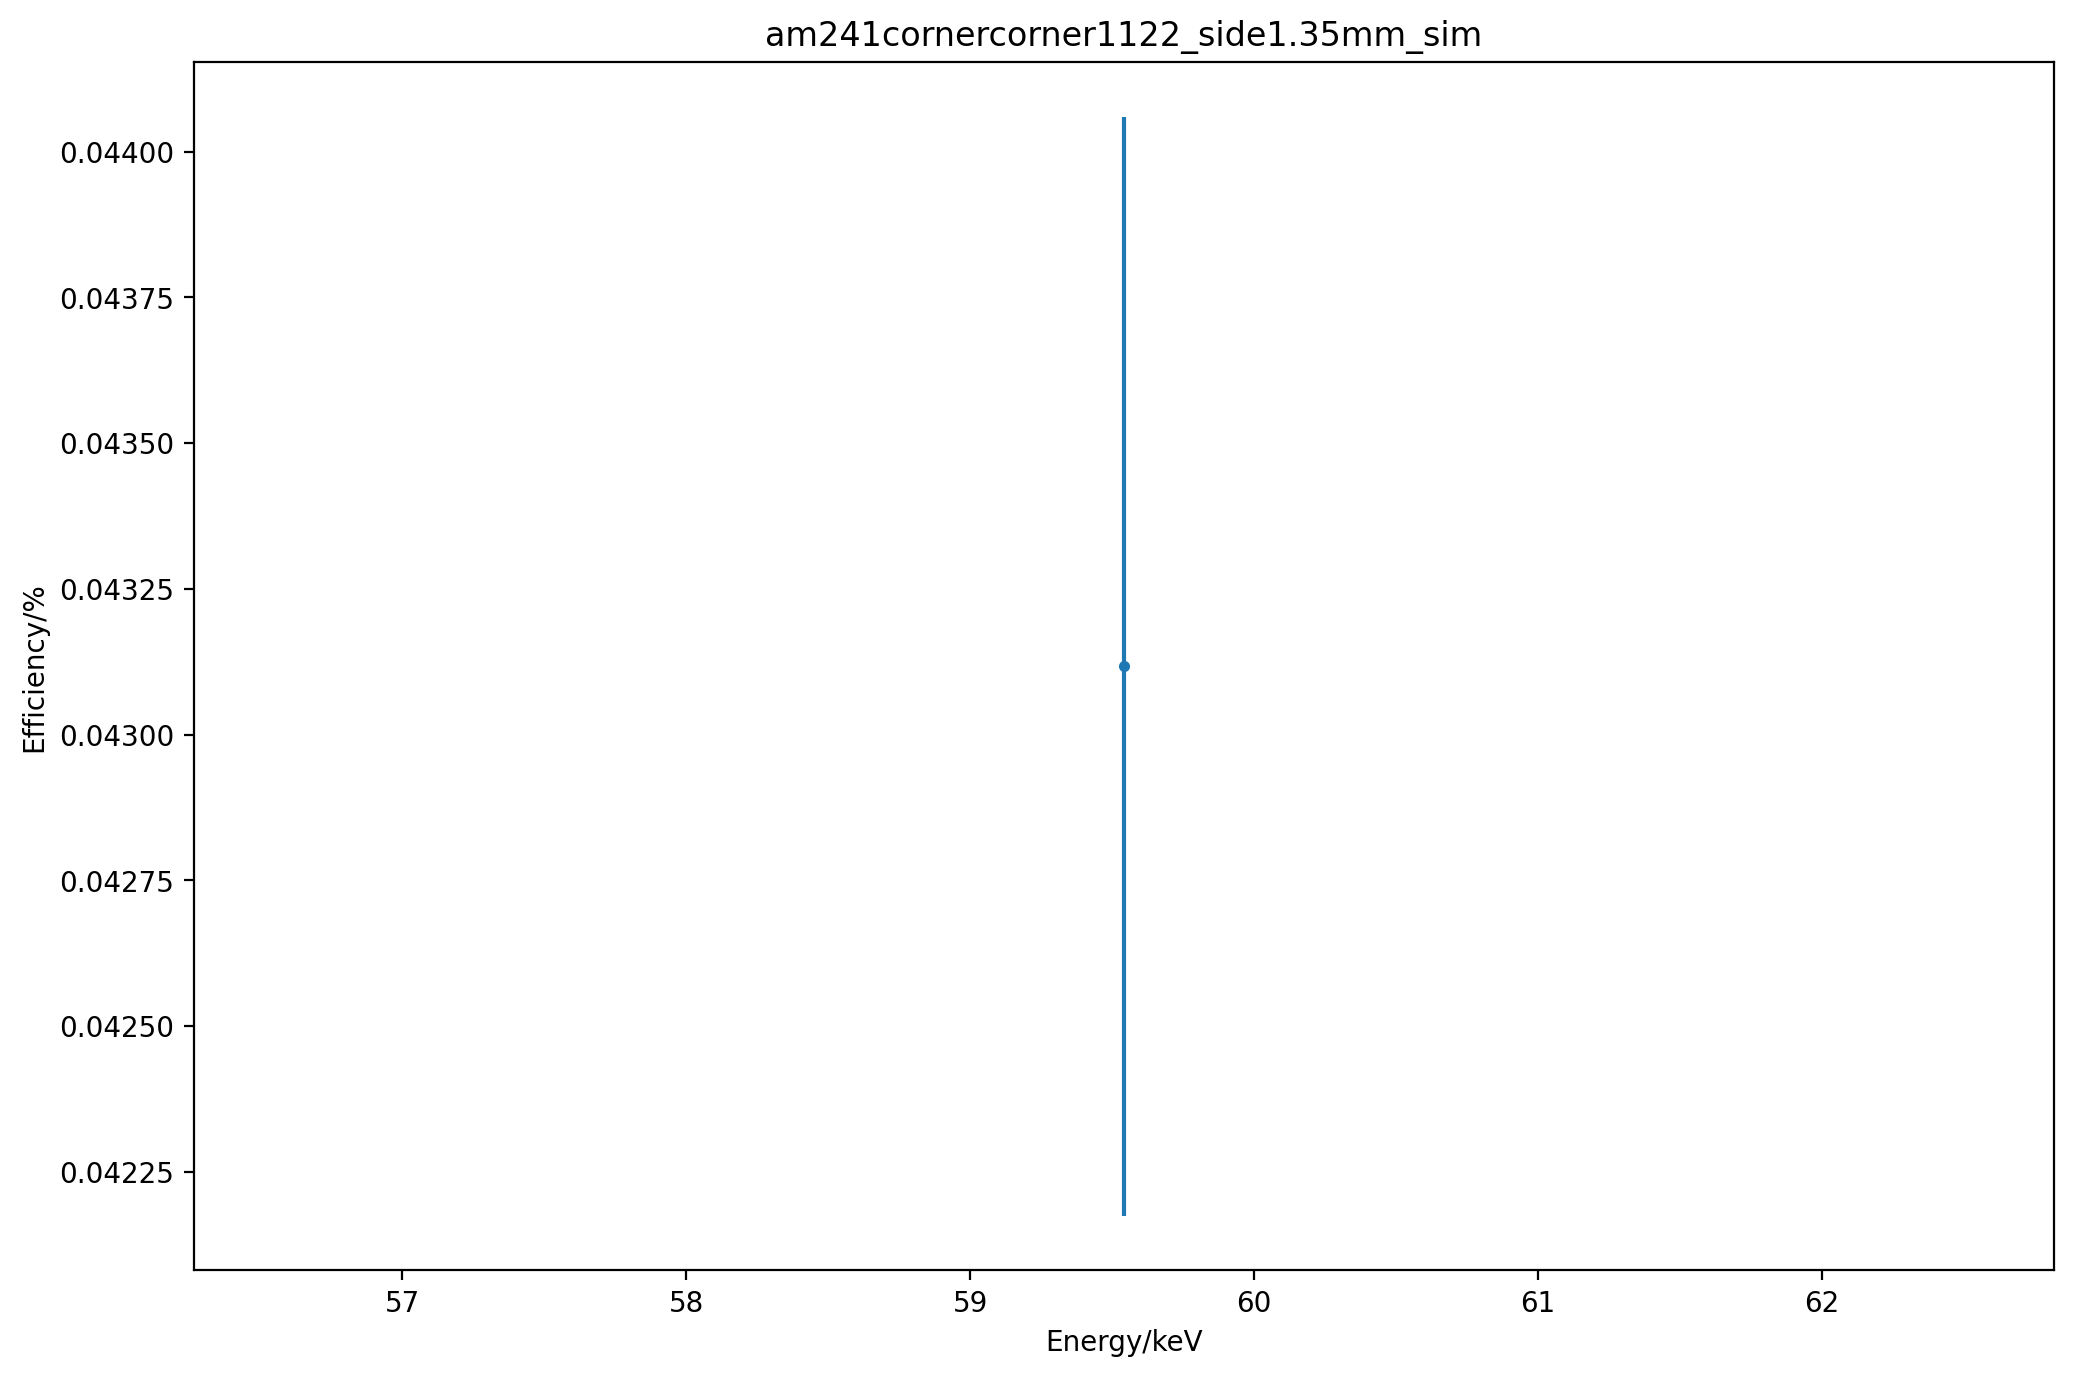


Working on simulation data for pb210 ...

    parent                  : pb210
    combined_simulation_file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat
    save_dir                : /home/thakur/lccfiles/cornercorner1122_side1.35mm
    
data_type: sim
plot_title    : pb210cornercorner1122_side1.35mm_sim
pdf/png_name  : /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_pb210cornercorner1122_side1.35mm.pdf

/home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat exists!
processing ....

Plot saved as /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_pb210cornercorner1122_side1.35mm.pdf/.png



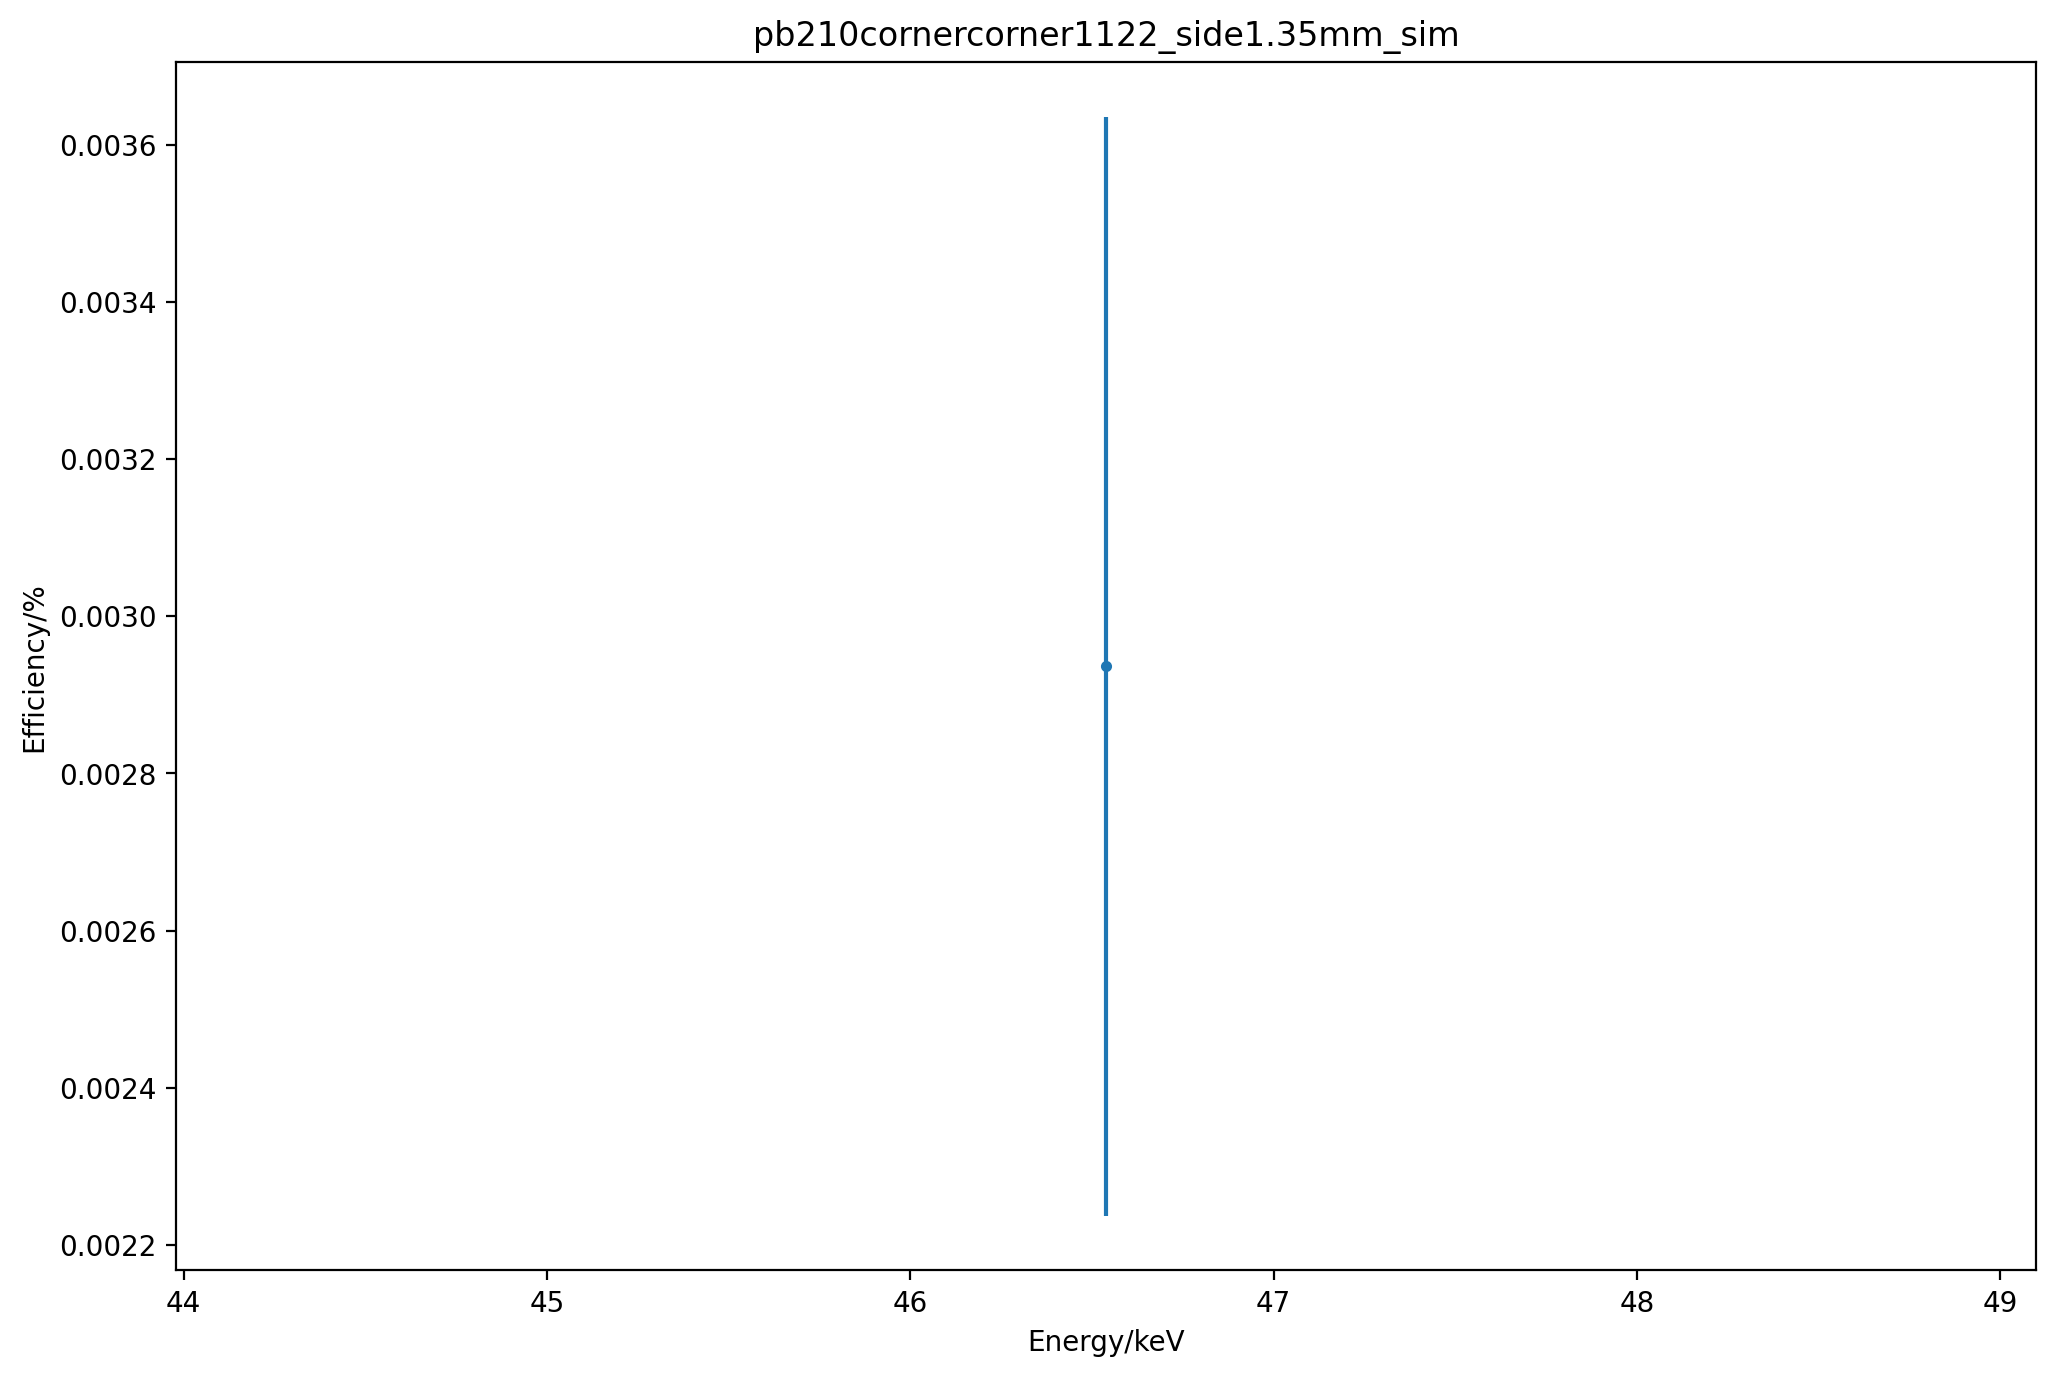


Working on simulation data for ra226 ...

    parent                  : ra226
    combined_simulation_file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat
    save_dir                : /home/thakur/lccfiles/cornercorner1122_side1.35mm
    
data_type: sim
plot_title    : ra226cornercorner1122_side1.35mm_sim
pdf/png_name  : /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_ra226cornercorner1122_side1.35mm.pdf

/home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_cornercorner1122_side1.35mm.dat exists!
processing ....

Plot saved as /home/thakur/lccfiles/cornercorner1122_side1.35mm/sim_ra226cornercorner1122_side1.35mm.pdf/.png



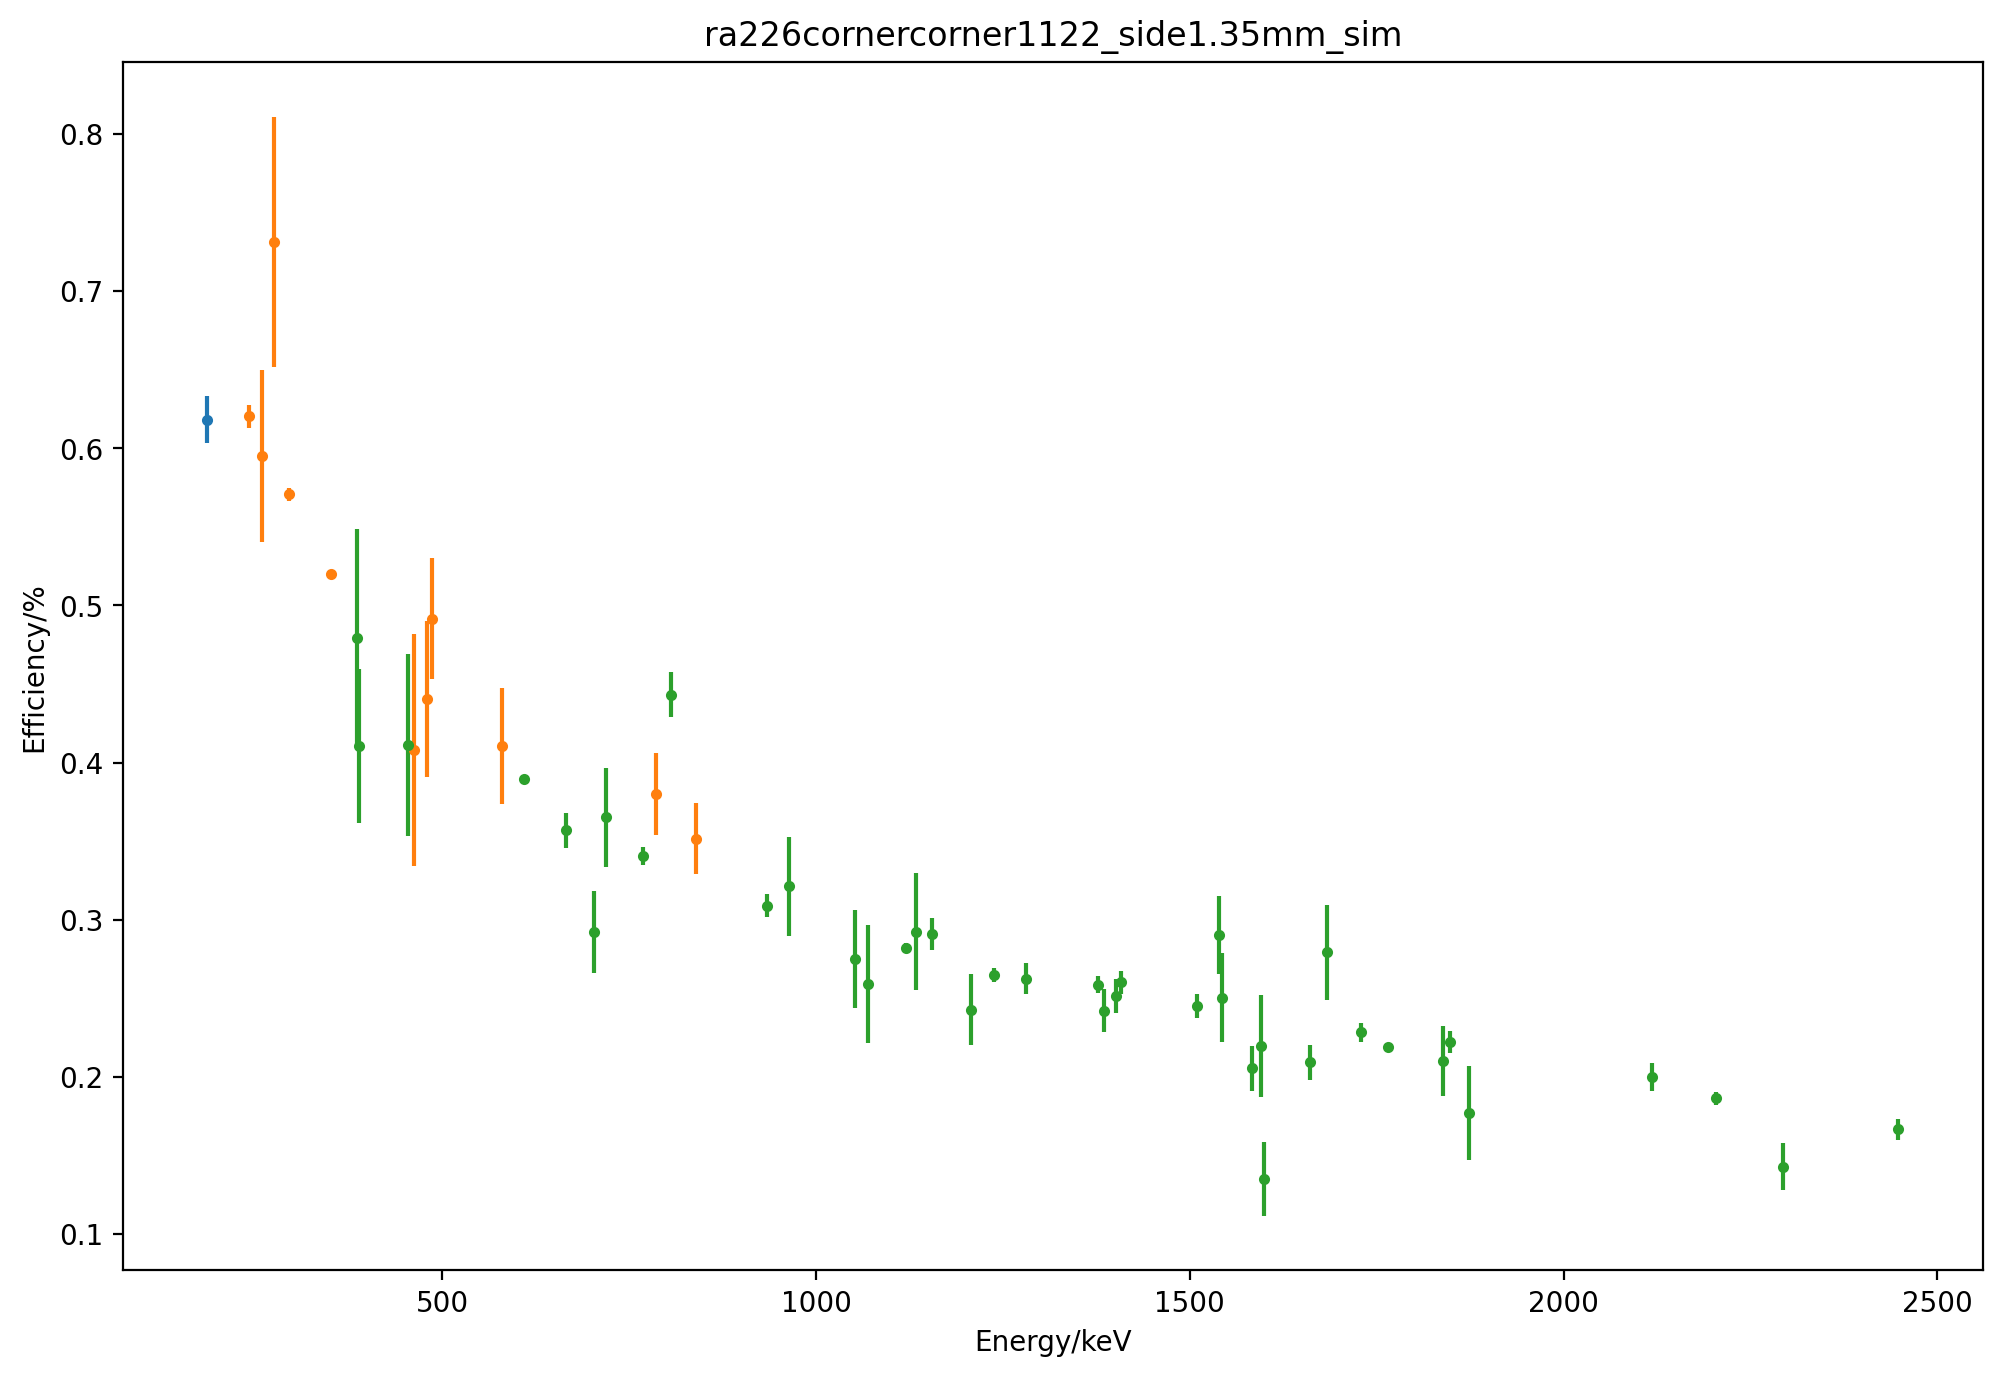


Working on simulation data for am241 ...

    parent                  : am241
    combined_simulation_file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat
    save_dir                : /home/thakur/lccfiles/cornercorner1122_side1.35mm
    
data_type: data
plot_title    : am241cornercorner1122_side1.35mm_data
pdf/png_name  : /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_am241cornercorner1122_side1.35mm.pdf

/home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat exists!
processing ....

Plot saved as /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_am241cornercorner1122_side1.35mm.pdf/.png



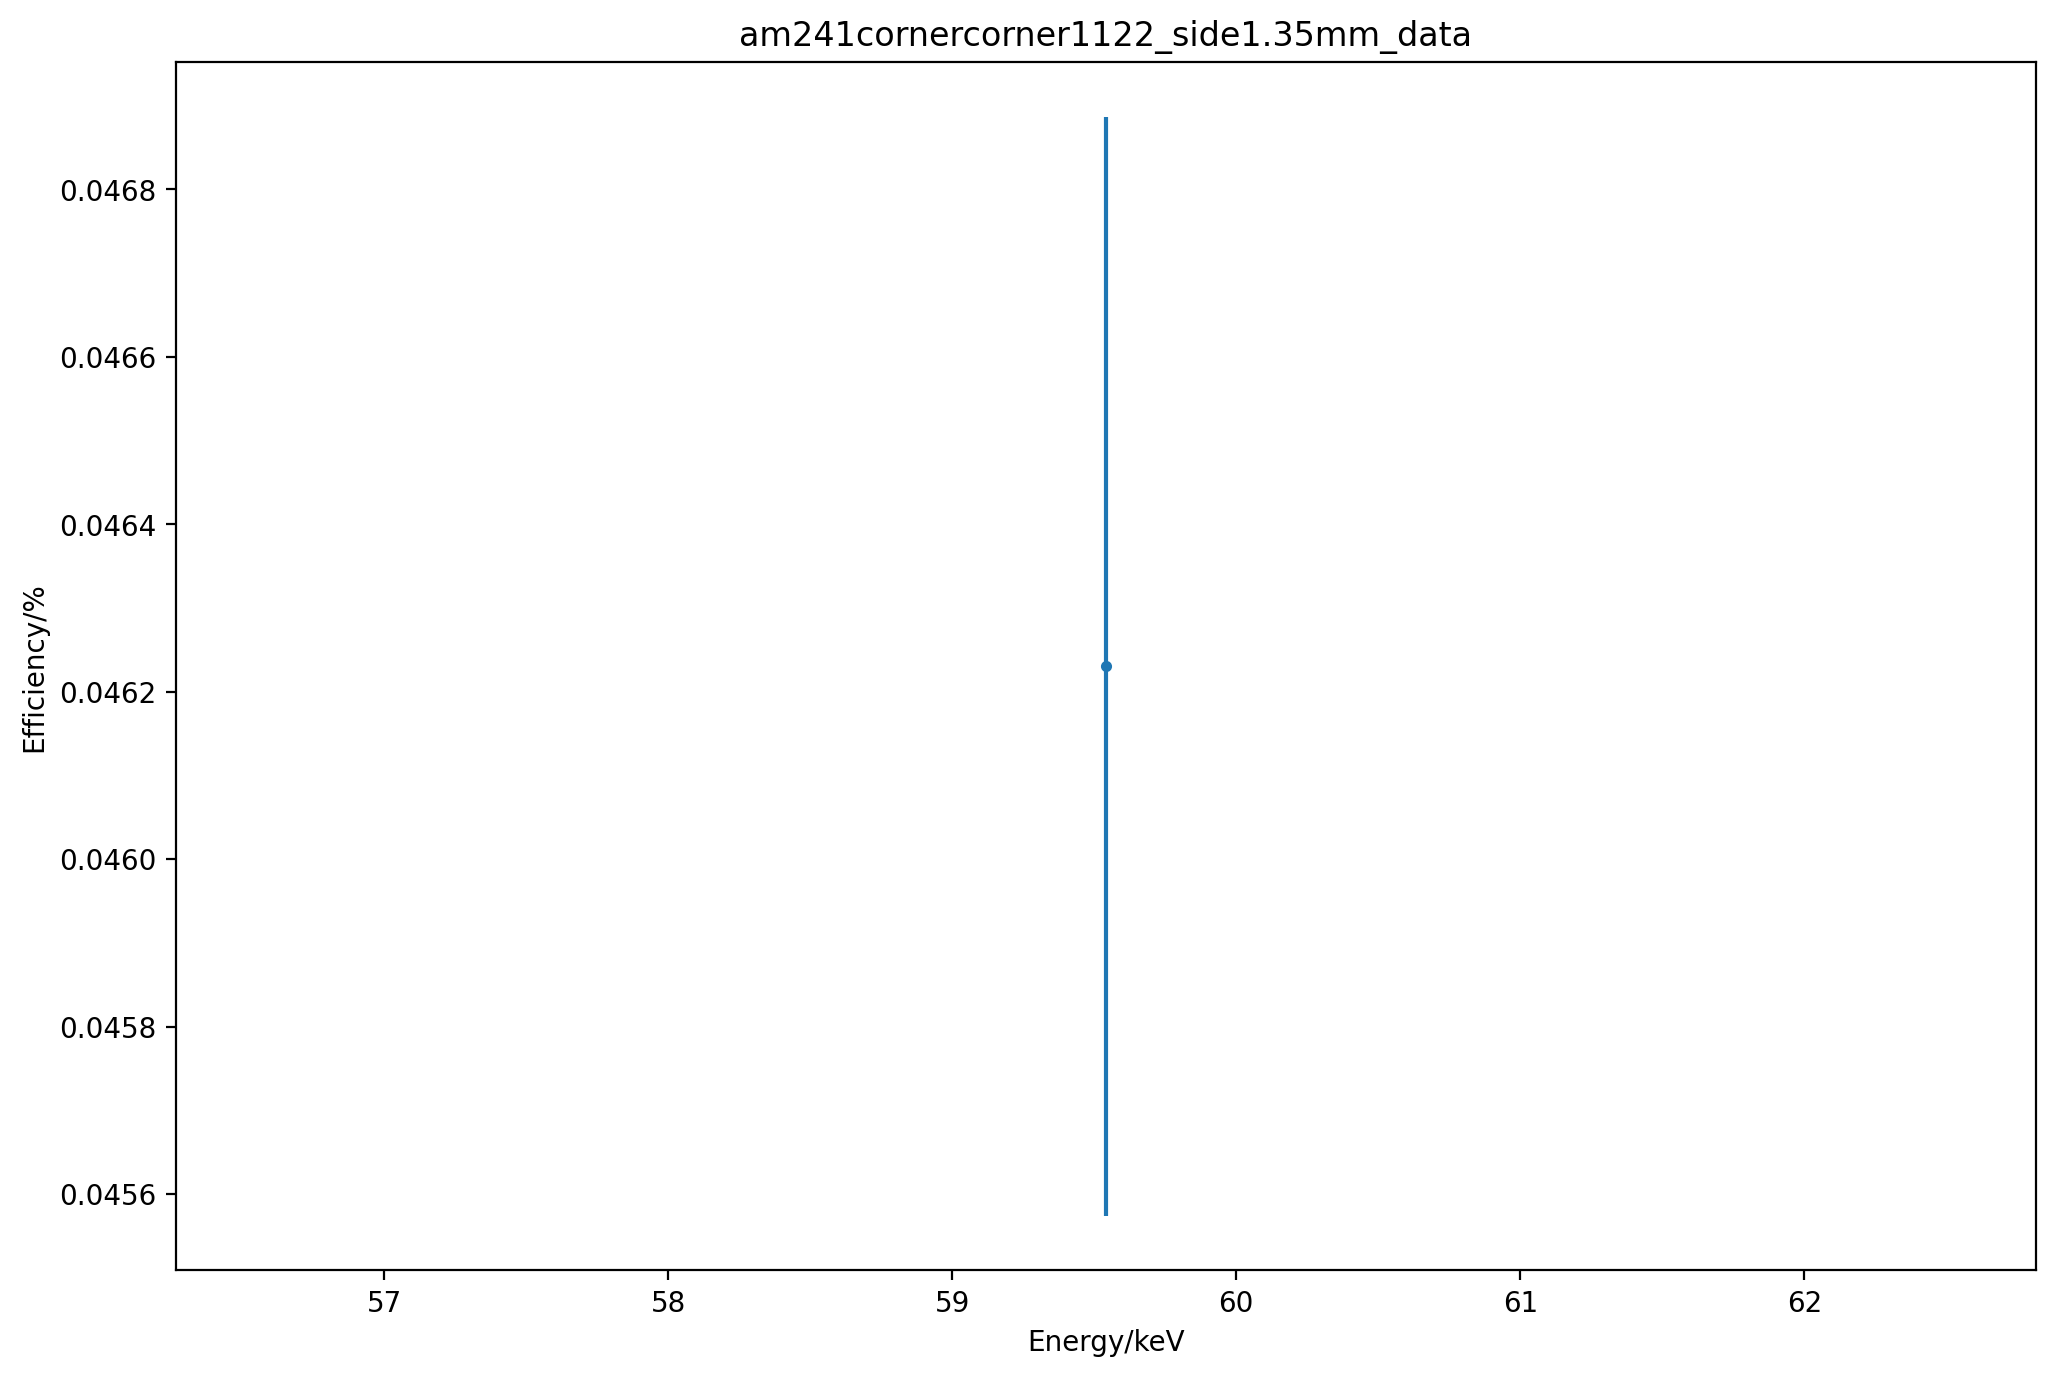


Working on simulation data for pb210 ...

    parent                  : pb210
    combined_simulation_file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat
    save_dir                : /home/thakur/lccfiles/cornercorner1122_side1.35mm
    
data_type: data
plot_title    : pb210cornercorner1122_side1.35mm_data
pdf/png_name  : /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_pb210cornercorner1122_side1.35mm.pdf

/home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat exists!
processing ....

Plot saved as /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_pb210cornercorner1122_side1.35mm.pdf/.png



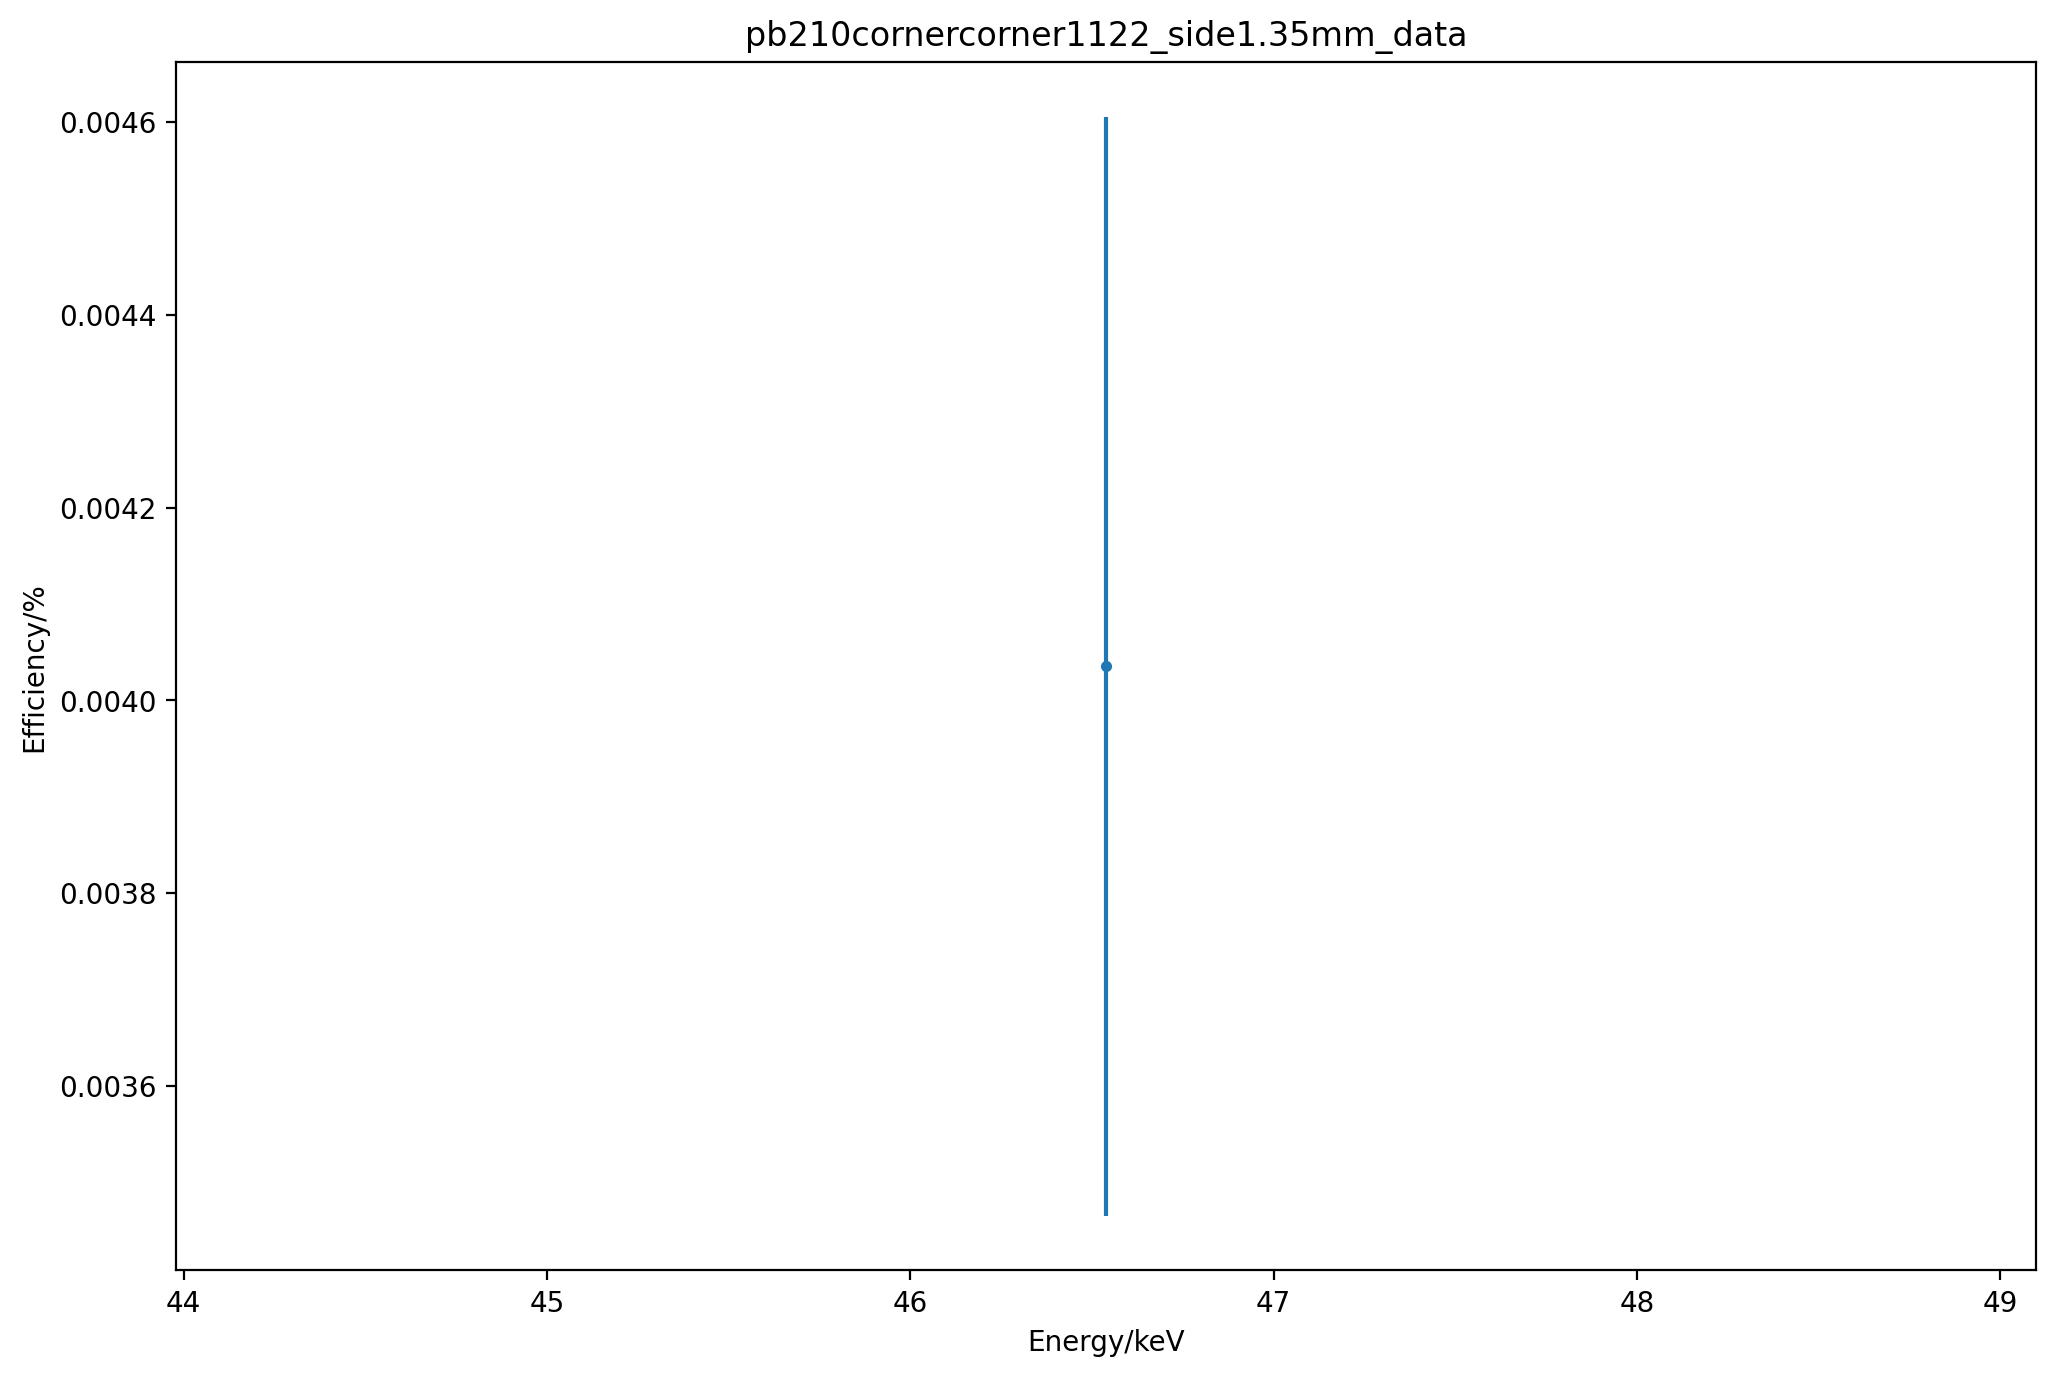


Working on simulation data for ra226 ...

    parent                  : ra226
    combined_simulation_file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat
    save_dir                : /home/thakur/lccfiles/cornercorner1122_side1.35mm
    
data_type: data
plot_title    : ra226cornercorner1122_side1.35mm_data
pdf/png_name  : /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_ra226cornercorner1122_side1.35mm.pdf

/home/thakur/lccfiles/cornercorner1122_side1.35mm/data_cornercorner1122_side1.35mm.dat exists!
processing ....

Plot saved as /home/thakur/lccfiles/cornercorner1122_side1.35mm/data_ra226cornercorner1122_side1.35mm.pdf/.png



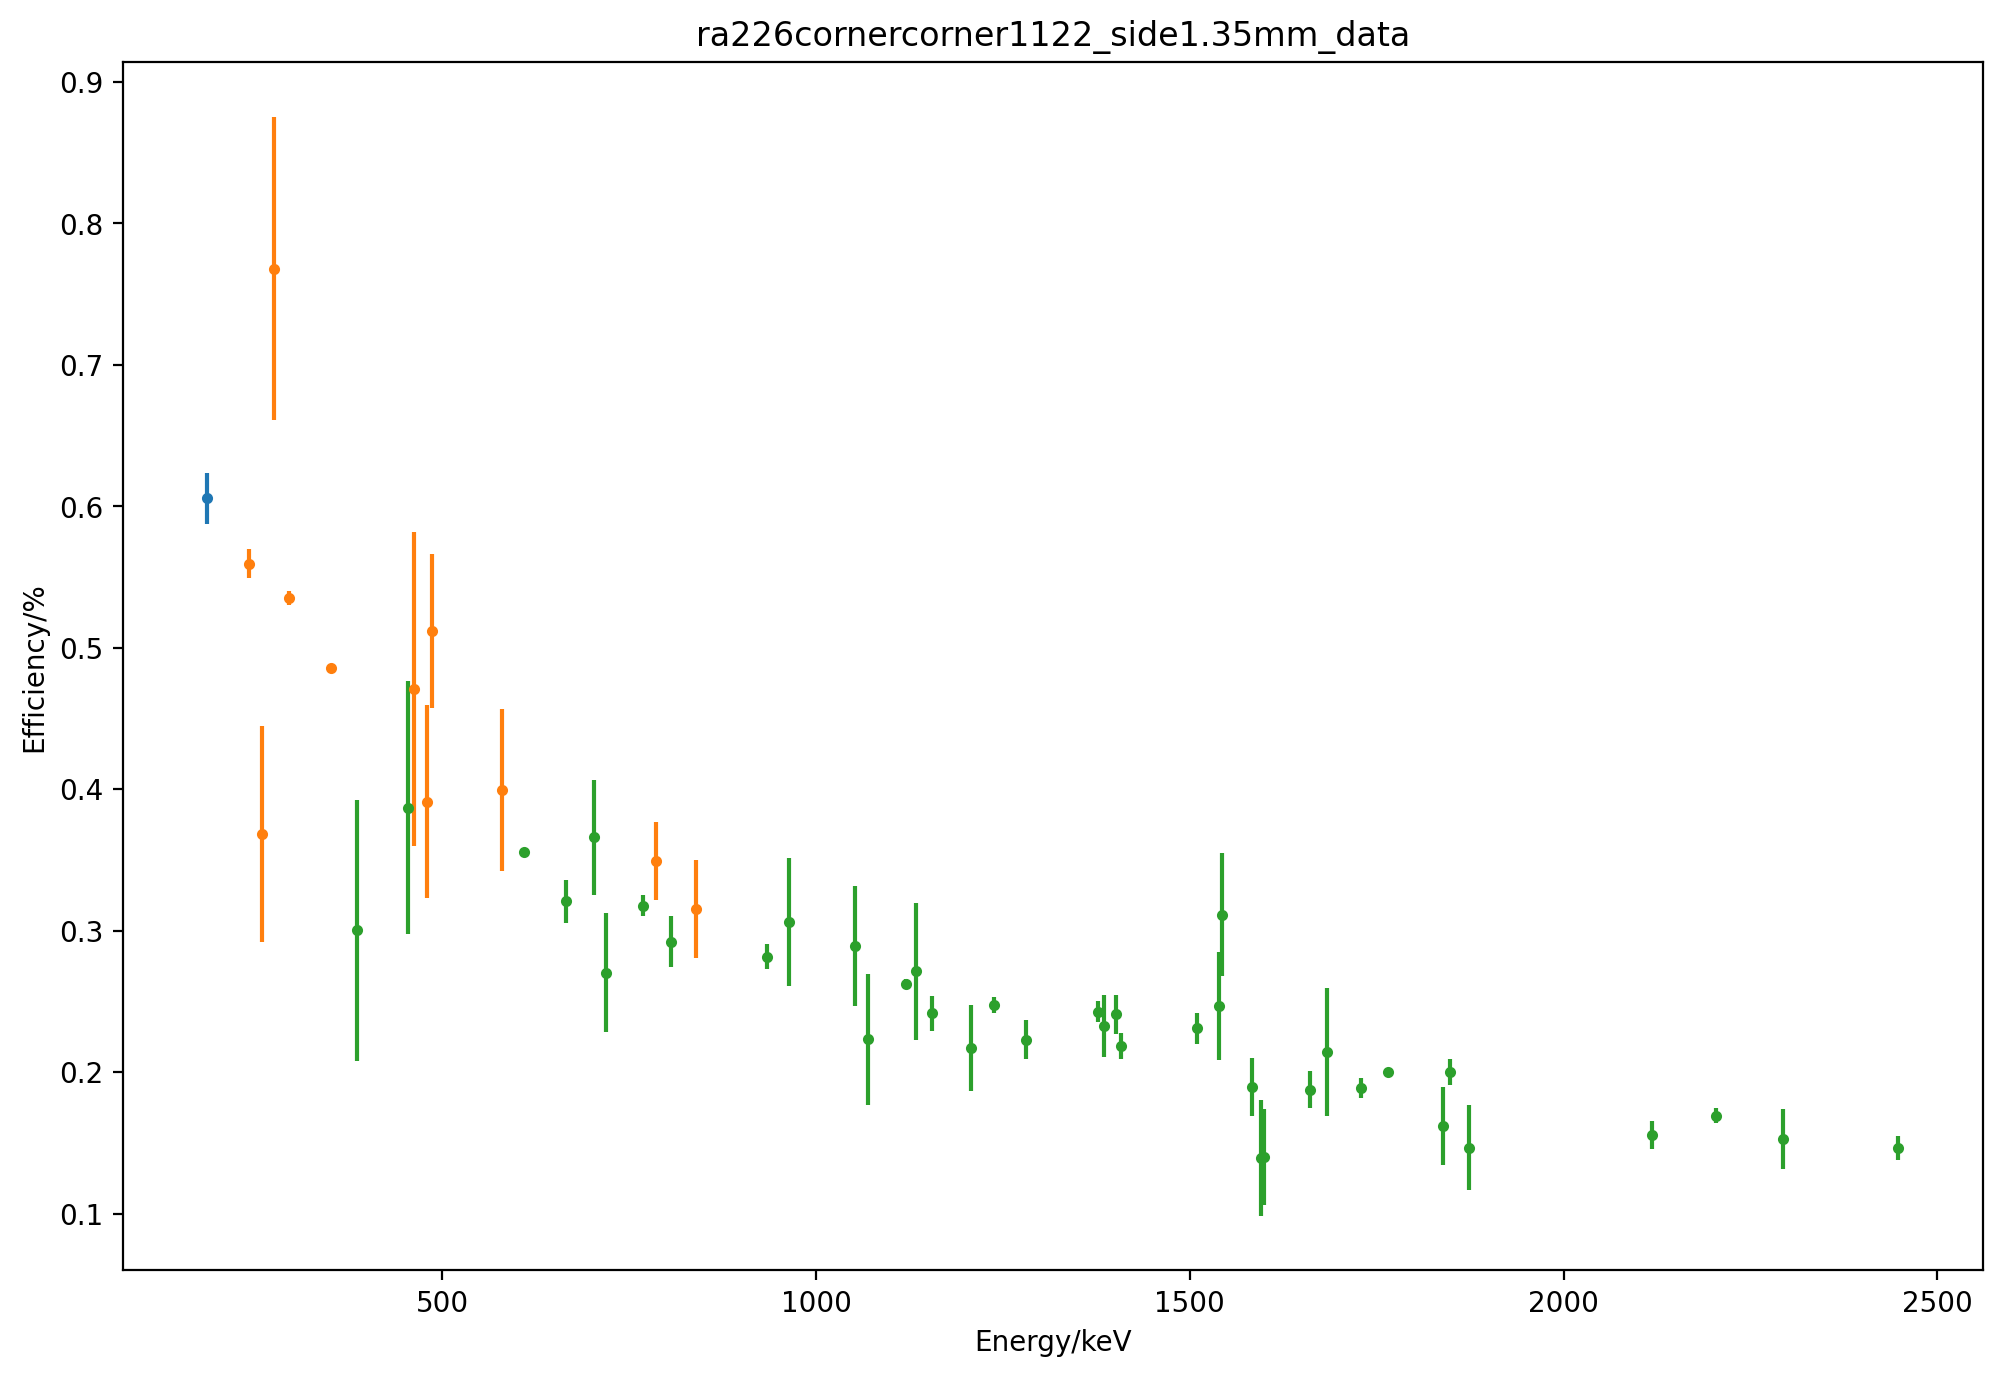

In [380]:
for iso in isotopes:
    #if iso!='am241':continue
    try:
        get_data_sim_plot(iso,combined_sim_file)
        #get_data_sim_plot(iso,combined_data_file)
    except:
        print(f'Error occured with :{iso}')
    continue
    
for iso in isotopes:
    try:
        #get_data_sim_plot(iso,combined_sim_file)
        get_data_sim_plot(iso,combined_data_file)
    except:
        print(f'Error occured with :{iso}')
        continue

In [381]:
#dest_path,data_suffix
correction_data_path=f'{sim_dir}/correction_{pos_text}.dat'
correction_data_path


'/home/thakur/lccfiles/cornercorner1122_side1.35mm/correction_cornercorner1122_side1.35mm.dat'

In [382]:

def get_correction_plot(parent,correction_data_path=correction_data_path,dest_path=sim_dir):
    """
    returns a correction plot based on the correction data for isotope/parent
    also returns source_correction.dat file
    """


    ethresh = 60 # keV
    
    print(f"""
parent               :{parent}
correction_data_path :{correction_data_path}
    """)
    
    #suff=correction_data_path.split('/')[-1].split('.')[0]
    
    title_name=f'{parent}_correction_{pos_text}'
 
    pdf_save_name=f'{dest_path}/{title_name}.pdf' #need to delete this if it is present as it is appended
   
    
    print(f'plot_save_name: {pdf_save_name}/.png')
    
    f=correction_data_path

    #check if correction data file exist
    if os.path.isfile(f):
        print(f'file: {f} exists')
        print('processing ....\n')
        time.sleep(5)
    else:
        print(f'file: {f} doesnot exist')
        print('quiting ....\n')
        sys.exit(1)
        time.sleep(5)

    #plot_title=f"{parent}_{suff}"
    
    
    data = []
    file = open(f, 'r')
    for line in file:
        words = line.split()
        if len(sys.argv) > 1:
            if words[0] != parent:
                continue
        data.append([
            [ words[0],        # 0: parent
              words[1] ],      # 0: isotope
            float(words[2]),   # 1: energy
            float(words[3]),   # 2: efficiency correction
            float(words[4]),   # 3: total error for a single gamma-ray (minus)
            float(words[5]),   # 4: total error for a single gamma-ray (plus)
            float(words[6]),   # 5: uncorrelated error (minus)
            float(words[7]),   # 6: uncorrelated error (plus)
            float(words[8]),   # 7: fractional correlated error (minus)
            float(words[9]) ]) # 8: fractional correlated error (plus)
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0] and data[e][1] == data[entry][1]:
                data.remove(data[e])
                break

    for entry in range(len(data)):
        data[entry] = [0] + data[entry][1:] # remove non-floats (isotope names)
    data = numpy.array(data)

    pyplot.errorbar(data[:,1], data[:,2], yerr=[data[:,5], data[:,6]], fmt='.' )
    pyplot.xlabel('Energy/keV')
    pyplot.ylabel('Data/simulation')
    pyplot.title(title_name)
    pyplot.autoscale(enable=True,axis='y')
    #pyplot.xlim(0, 2500)
    #pyplot.ylim(0.00,2.00)

    pol0  = ROOT.TF1('pol0','[0]',0,2500)
    pol0.SetParameter(0,1)
    pol1  = ROOT.TF1('pol1','[0]+[1]*x',0,2500)
    pol1.SetParameters(1,0)


    #mightneed to remove it if alreay presents
    file = open(geiv_source_corr_file, 'a')
    if sum(ene > ethresh for ene in data[:,1]) > 1:
        # Fit and plot correction as a function of energy for all calibrations.
        print("Fit data for :"+parent)
        print()
        time.sleep(3)
        #ROOT.gStyle.SetOptFit(1111) #didnot work
        graph = ROOT.TGraphAsymmErrors( len(data[:,1]),
                                        array.array('d', data[:,1]),
                                        array.array('d', data[:,2]),
                                        0,
                                        0,
                                        array.array('d', data[:,5]),
                                        array.array('d', data[:,6]) )
        result = graph.Fit('pol0','remqs','',60,2500)
        result.Print()

        #get the chisquare and mean
        mean=round(result.Parameter(0),3)      #p0
        meanerr=round(result.ParError(0),3)    #p0 error
        #meanlowerr=round(result.LowerError(0)    #error
        #meanhigherr=result.LowerError(0)    #error
        chi2=round(result.Chi2(),3)            #chisquare
        #print the values
        print("p0: {} p0 error: {}\n".format(mean,meanerr))
        print("chi^2: {} \n".format(chi2))

        #putting p0 and x^2 in the pyplot
        pyplot.text(2000,1.25,r"p0: "+str(mean)+" $\pm$ "+str(meanerr),color='red')
        pyplot.text(2000,1.15,r"$\chi^{2}$: "+str(chi2),color='red')


        file.write('{:6s} {:e} {:e} {:e} {:e} {:e}\n'.format( parent,
                                                              result.Parameters()[0],
                                                              -result.LowerError(0),
                                                              result.UpperError(0),
                                                              data[0][7], data[0][8] ))
        xs = numpy.linspace(0, 2500, num=2501)
        ys = []
        for x in xs:
            ys.append( pol0.Eval(x) )
        #get the information about xs and ys
        #for i in range(len(xs)):
        #    print("xs: {}  ys: {}".format(xs[i],ys[i]))
        pyplot.plot(xs, ys)
        pyplot.xticks(numpy.arange(min(xs),max(xs)+100,100))
        pyplot.xticks(rotation=70)
        pyplot.grid(axis='both',linestyle='--',linewidth=0.5,alpha=0.5)
        #annotate in the plot
        #fig,ax=pyplot.subplots()
        #for i,txt in enumerate(xs):
           # pyplot.annotate(str(txt),(xs[i],ys[i]))

    elif sum(ene > ethresh for ene in data[:,1]) == 1:

        file.write('{:6s} {:e} {:e} {:e} {:e} {:e}\n'.format( parent,
                                                              data[:,2][-1],
                                                              data[:,5][-1],
                                                              data[:,6][-1],
                                                              data[0][7], data[0][8] ))
    else:
        file.write('{:6s} {:e} {:e} {:e} {:e} {:e}\n'.format( parent,
                                                              -9,1,1,
                                                              data[0][7], data[0][8] ))
    file.close()

    #attempt to get 
    ax=pyplot.gca()
    line=ax.lines[0]
    lineval=line.get_xydata()
    xdata=line.get_xdata() #xdata
    ydata=line.get_ydata() #ydata

    #print("xy-val",lineval)
    #annotate

    for i,txt in enumerate(xdata):
      pyplot.annotate(str(txt),(xdata[i],ydata[i]),fontsize=5)

    #pyplot.figure(figsize=(12,8))
    #pyplot.savefig(fileloc+'correctiondoor-s-0.3-t-0.11-d-1.68'+parent+'.pdf', bbox_inches='tight')
    pyplot.savefig(pdf_save_name, bbox_inches='tight')
    pyplot.savefig(pdf_save_name.replace('.pdf','.png'), bbox_inches='tight')
    print(f'plot saved at : {pdf_save_name}/.png\n')
    pyplot.show()
    #print("Plot are at "+fileloc+'correctiondoor-s-0.3-t-0.11-d-1.68'+parent+'.pdf')

#pyplot.show()

In [383]:
geiv_source_corr_file='source_correction.dat'


parent               :am241
correction_data_path :/home/thakur/lccfiles/cornercorner1122_side1.35mm/correction_cornercorner1122_side1.35mm.dat
    
plot_save_name: /home/thakur/lccfiles/cornercorner1122_side1.35mm/am241_correction_cornercorner1122_side1.35mm.pdf/.png
file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/correction_cornercorner1122_side1.35mm.dat exists
processing ....

plot saved at : /home/thakur/lccfiles/cornercorner1122_side1.35mm/am241_correction_cornercorner1122_side1.35mm.pdf/.png



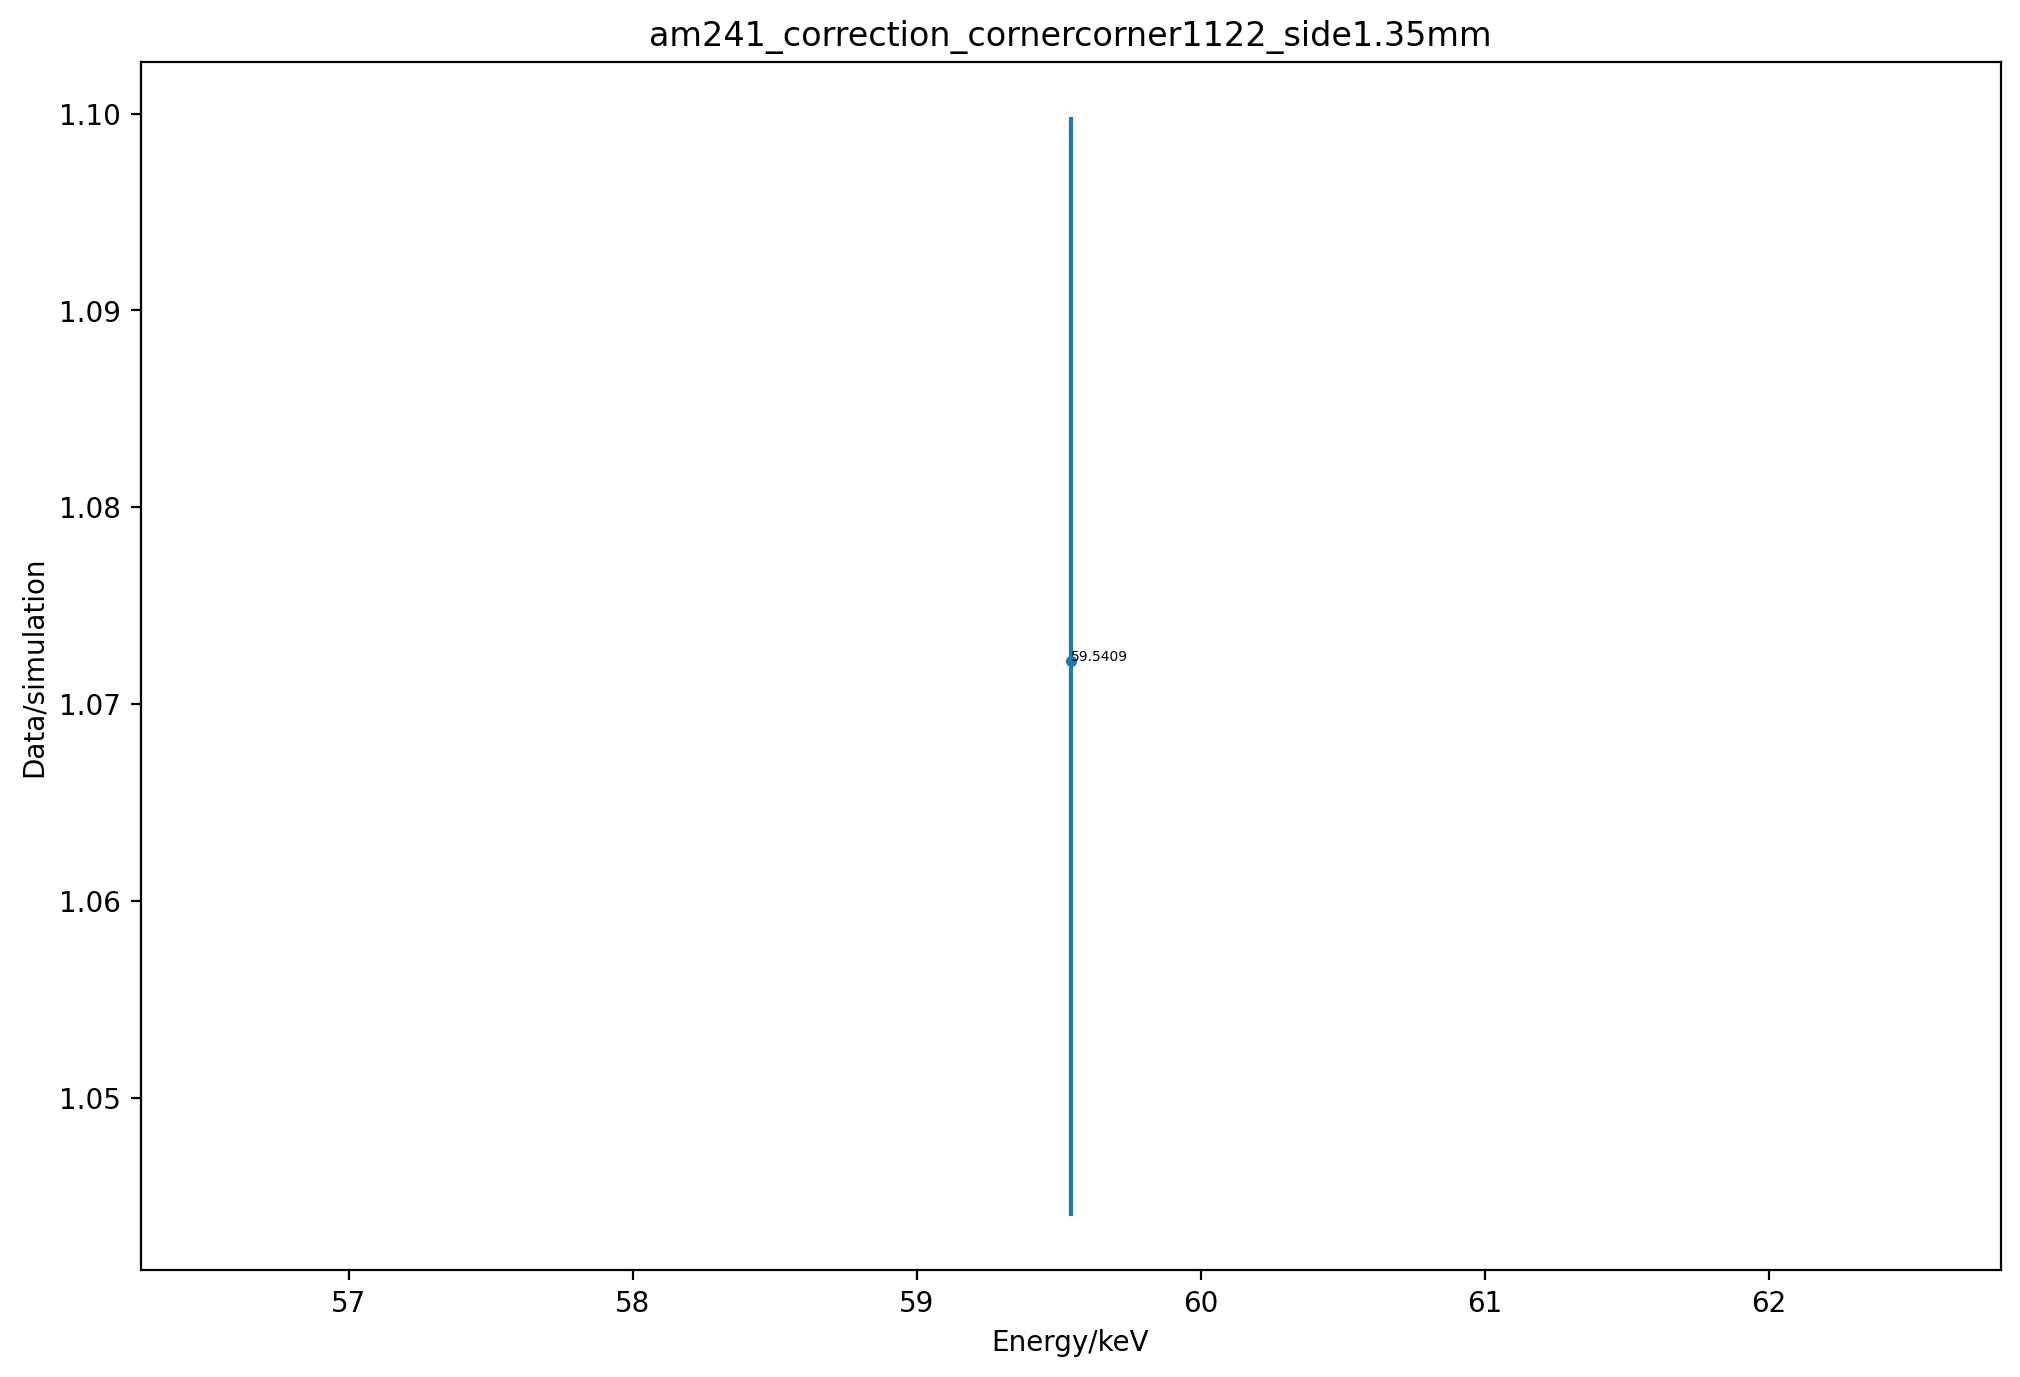


parent               :pb210
correction_data_path :/home/thakur/lccfiles/cornercorner1122_side1.35mm/correction_cornercorner1122_side1.35mm.dat
    
plot_save_name: /home/thakur/lccfiles/cornercorner1122_side1.35mm/pb210_correction_cornercorner1122_side1.35mm.pdf/.png
file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/correction_cornercorner1122_side1.35mm.dat exists
processing ....

Error occured for pb210..continue for next 

parent               :ra226
correction_data_path :/home/thakur/lccfiles/cornercorner1122_side1.35mm/correction_cornercorner1122_side1.35mm.dat
    
plot_save_name: /home/thakur/lccfiles/cornercorner1122_side1.35mm/ra226_correction_cornercorner1122_side1.35mm.pdf/.png
file: /home/thakur/lccfiles/cornercorner1122_side1.35mm/correction_cornercorner1122_side1.35mm.dat exists
processing ....

Fit data for :ra226

p0: 0.921 p0 error: 0.004

chi^2: 54.413 

plot saved at : /home/thakur/lccfiles/cornercorner1122_side1.35mm/ra226_correction_cornercorner1122_side1.35

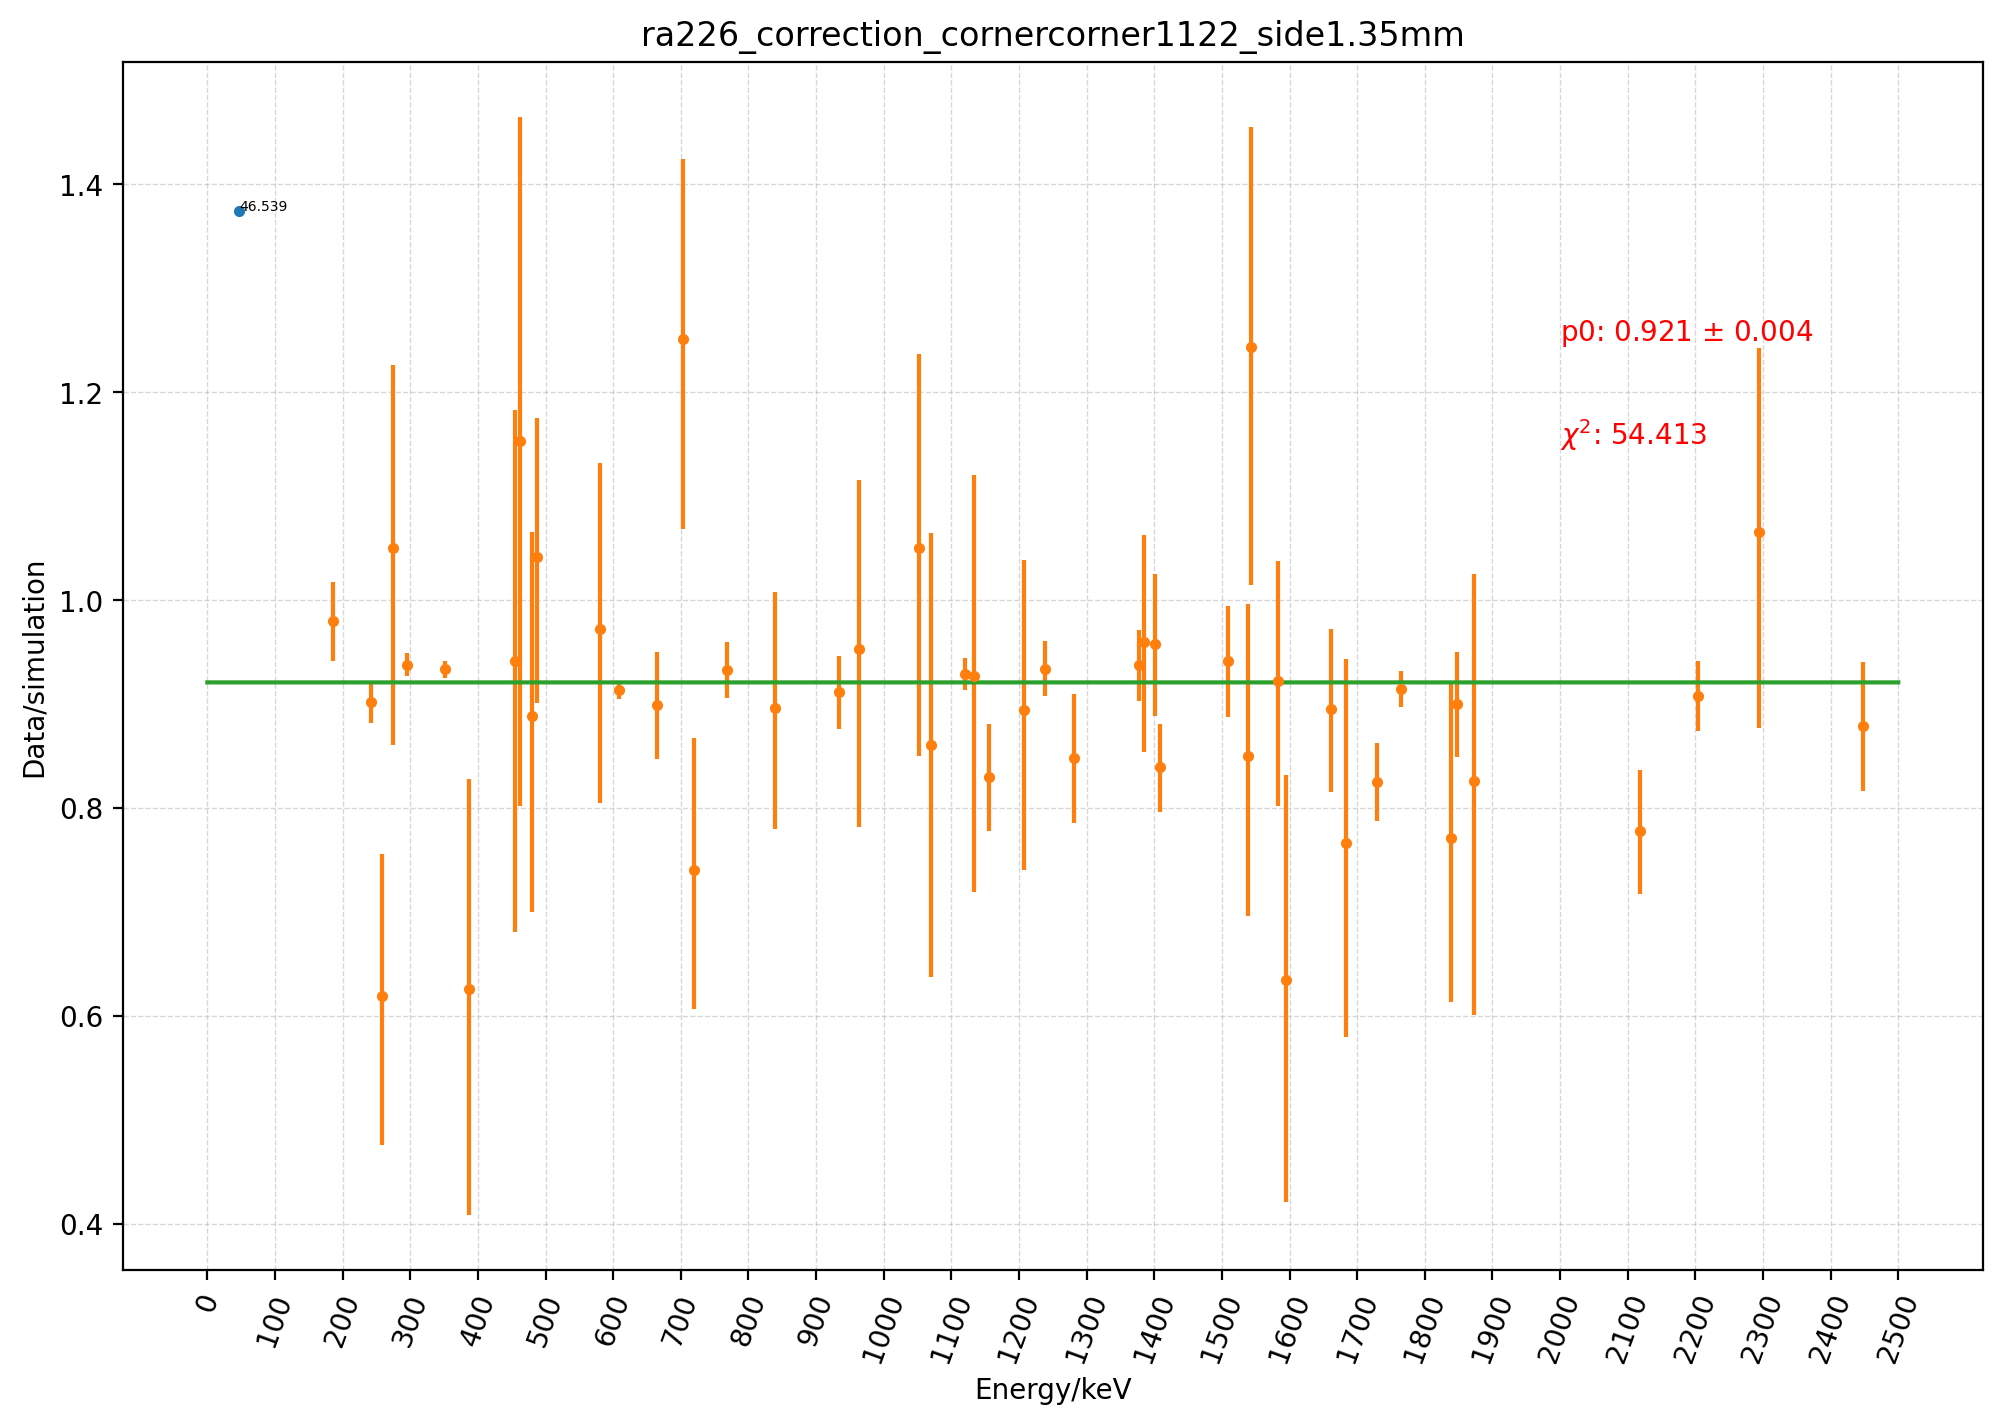


****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =      54.4126
NDf                       =           47
Edm                       =  6.74879e-08
NCalls                    =           32
p0                        =      0.92083   +/-   0.0040629     -0.00406364  +0.00406208   (Minos) 


In [384]:
#remove a file before running as result is appended
! rm -rf "{geiv_source_corr_file}"
for iso in isotopes:
    try:
        get_correction_plot(iso)
    except:
        print(f'Error occured for {iso}..continue for next ')
        continue

In [385]:
! cat "{geiv_source_corr_file}"


am241  -9.000000e+00 1.000000e+00 1.000000e+00 1.506504e-02 1.493898e-02
ra226  9.208299e-01 4.063642e-03 4.062078e-03 1.509854e-02 1.496154e-02


In [386]:
! mv -v "{geiv_source_corr_file}" "{sim_dir}/source_correction_{pos_text}.dat"

renamed 'source_correction.dat' -> '/home/thakur/lccfiles/cornercorner1122_side1.35mm/source_correction_cornercorner1122_side1.35mm.dat'


# PLOT CORRECTIONS

In [387]:


def get_correction_plots(source_correction_data):
    ethresh = 60 # keV
    ###############################################
    # total_simulations='25M'
    # fileloc="/home/thakur/geivanalysis/geiv_cornercorner1122"
    # file_name=f"source_correction_cornercorner1122_{total_simulations}.dat"
    # source_position="cornercorner1122"
    
    print(f'source_correction_data: {source_correction_data}')
    
    f=source_correction_data
    
    pdf_name=f'{sim_dir}/source_correction_{pos_text}.pdf'
    pdf_name1=f'{sim_dir}/correction_correlated_{pos_text}.pdf'

    #print("Source correction data file:\t",f)

    #check if file exists
    if os.path.exists(f):
        print("file exists: ",f)
        print('processing...!\n')
        time.sleep(5)

        #os.remove(f)
        #print("file removed: ",f)
    else:
        print("file doesnot exist: ",f)
        print('quiting..\n')
        time.sleep(5)
        sys.exit(1)

    #print("file:\t",f)

    data = []
    file = open(f, 'r')
    for line in file:
        print("line:\t",line)
        words = line.split()
        data.append([
            words[0],          # 0: parent
            float(words[1]),   # 1: correction
            float(words[2]),   # 2: uncorrelated error (minus)
            float(words[3]),   # 3: uncorrelated error (plus)
            float(words[4]),   # 4: fractional correlated error (minus)
            float(words[5]) ]) # 5: fractional correlated error (plus)
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0]:
                data.remove(data[e])
                break

    # Make isotope names nice for axis labels.
    parents = []
    for d in data:
        parents.append(d[0])
    for p in range(len(parents)):
        parents[p] = parents[p][0].upper()+parents[p][1]+'-'+parents[p][2:]
    xs = numpy.arange(0, len(parents))

    for entry in range(len(data)):
        data[entry] = [0] + data[entry][1:] # remove non-floats (isotope names)
    data = numpy.array(data)

    c   = data[:,1]
    lo  = data[:,2]
    hi  = data[:,3]

    # Add in source activity error.
    lo2  = lo
    hi2  = hi
    lo2  = lo2/data[:,1] # why does /= now work here
    lo2 /= data[:,1]
    lo2 *= lo2
    lo2 += data[:,4]*data[:,4]
    lo2  = numpy.sqrt(lo2)
    lo2 *= data[:,1]
    hi2  = hi2/data[:,1] # why does /= now work here
    hi2 *= hi2
    hi2 += data[:,5]*data[:,5]
    hi2  = numpy.sqrt(hi2)
    hi2 *= data[:,1]

    # Remove sources with lines only below threshold (at least for now).
    keep = []
    for d in range(len(data)):
        if data[d][1] > 0:
            keep.append(d)
    c   =  c[keep]
    lo  = lo[keep]
    hi  = hi[keep]
    lo2 = lo2[keep]
    hi2 = hi2[keep]
    x   = xs[keep]

    pyplot.errorbar(x, c, yerr=[lo, hi], fmt='.' )
    pyplot.ylabel('Data/simulation')
    pyplot.xlim(xs[0]-0.5, xs[-1]+0.5)
    pyplot.xticks(xs, parents)
    #pyplot.ylim(0.0, 1.2)
    pyplot.autoscale(enable=True,axis='y')
    pyplot.title(f"correction_{pos_text}")

    pol0  = ROOT.TF1('pol0','[0]',      xs[0]-0.5, xs[-1]+0.5)
    pol0.SetParameter(0,1)
    pol1  = ROOT.TF1('pol1','[0]+[1]*x',xs[0]-0.5, xs[-1]+0.5)
    pol1.SetParameters(1,0)

    graph = ROOT.TGraphAsymmErrors( len(x),
                                    array.array('d', x),
                                    array.array('d', c),
                                    0,
                                    0,
                                    array.array('d', lo),
                                    array.array('d', hi) )
    pol0.SetParameter(0,0.9)
    result = graph.Fit('pol0', 'remqs', '', xs[0]-1, xs[-1]+1)
    ROOT.gStyle.SetOptFit(1011)
    result.Print()
    xs = numpy.linspace(xs[0]-1, xs[-1]+1, num=99)
    ys = []
    for x in xs:
        ys.append( pol0.Eval(x) )
    pyplot.plot(xs, ys)

    pyplot.savefig(pdf_name, bbox_inches='tight')
    pyplot.savefig(pdf_name.replace('.pdf','.png'), bbox_inches='tight')
    print(f'{pdf_name}/.png created!')
    pyplot.clf()

    xs = numpy.arange(0, len(parents))
    x  = xs[keep]
    pyplot.errorbar(x, c, yerr=[lo2, hi2], fmt='.' )
    pyplot.ylabel('Data/simulation')
    pyplot.xlim(xs[0]-0.5, xs[-1]+0.5)
    pyplot.xticks(xs, parents)
    #pyplot.ylim(0.0, 1.2) #ylim(bottom,top)
    pyplot.autoscale(enable=True,axis='y')
    pyplot.title(f"correction-correlated_{pos_text}")

    graph = ROOT.TGraphAsymmErrors( len(x),
                                    array.array('d',x),
                                    c, 0, 0, lo2, hi2 )
    pol0.SetParameter(0,0.9)
    result = graph.Fit('pol0', 'remqs', '', xs[0]-1, xs[-1]+1)
    result.Print()
    #show the parameters in the graph
    ROOT.gStyle.SetOptFit(1011)
    xs = numpy.linspace(xs[0]-1, xs[-1]+1, num=99)
    ys = []
    for x in xs:
        ys.append( pol0.Eval(x) )
    pyplot.plot(xs, ys)

    pyplot.savefig(pdf_name1, bbox_inches='tight')
    pyplot.savefig(pdf_name1.replace('.pdf','.png'), bbox_inches='tight')
    print(f"\n{pdf_name1}/.png created")



source_correction_data: /home/thakur/lccfiles/cornercorner1122_side1.35mm/source_correction_cornercorner1122_side1.35mm.dat
file exists:  /home/thakur/lccfiles/cornercorner1122_side1.35mm/source_correction_cornercorner1122_side1.35mm.dat
processing...!

line:	 am241  -9.000000e+00 1.000000e+00 1.000000e+00 1.506504e-02 1.493898e-02

line:	 ra226  9.208299e-01 4.063642e-03 4.062078e-03 1.509854e-02 1.496154e-02

/home/thakur/lccfiles/cornercorner1122_side1.35mm/source_correction_cornercorner1122_side1.35mm.pdf/.png created!

/home/thakur/lccfiles/cornercorner1122_side1.35mm/correction_correlated_cornercorner1122_side1.35mm.pdf/.png created

****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =  1.26244e-23
NDf                       =            0
Edm                       =  2.16497e-16
NCalls                    =           33
p0                        =      0.92083   +/-   0.00406286    -0.00406364  +0.00406208   (Minos) 

**********

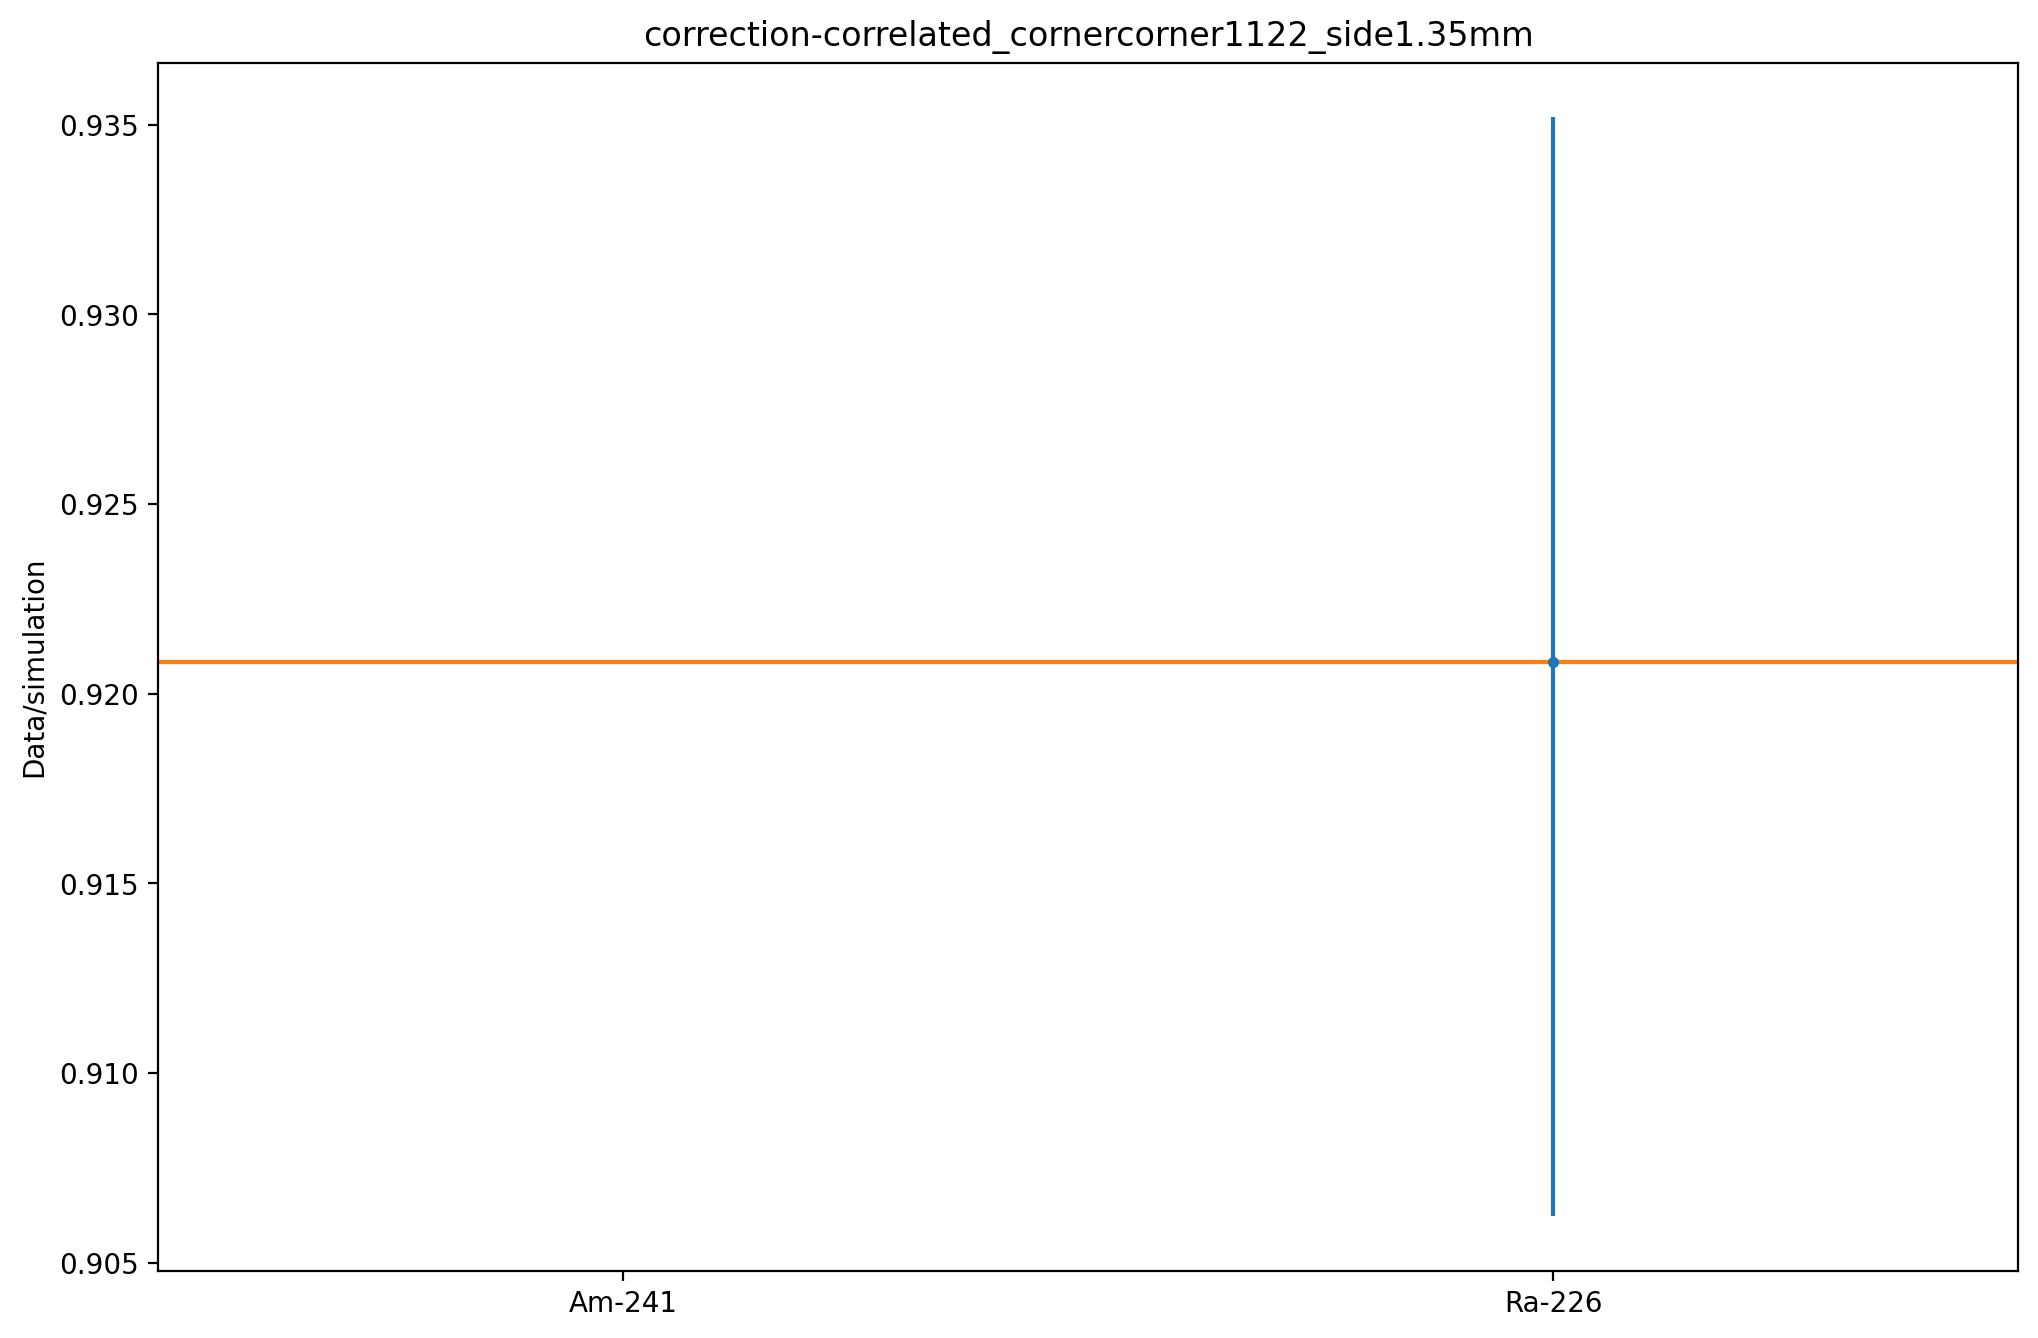

In [388]:
source_correction_data=f'{sim_dir}/source_correction_{pos_text}.dat'
get_correction_plots(source_correction_data=source_correction_data)

In [389]:
#copy all the contents of results dir to original dir
print(f"DONE @.... {datetime.datetime.now()}")


DONE @.... 2024-11-23 23:57:44.548223


# PLOT EFFICIENCY

In [390]:

def get_efficiency_plot(data_file=combined_data_file,sim_file=combined_sim_file):
    '''
    produce efficiency plot for give data and simulation values
    '''
    print(f'''
data_file: {data_file}
sim_file : {sim_file}
    ''')
    
    #check if file exists
    check_file(data_file)
    check_file(sim_file)
    
    data = []
    file = open(data_file, 'r')
    for line in file:
        words = line.split()
        if len(sys.argv) > 1:
               if words[0] != parent:
                   continue
        data.append([
            [ words[0],         # 0: parent
              words[1] ],       # 0: isotope
            float(words[ 2]),   # 1: energy
            float(words[ 3]),   # 2: efficiency
            float(words[ 4]),   # 3: uncorrelated error (minus)
            float(words[ 5]),   # 4: uncorrelated error (plus)
            float(words[ 8]),   # 5: total activity error (minus)
            float(words[ 9]) ]) # 6: total activity error (plus)
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0] and data[e][1] == data[entry][1]:
                data.remove(data[e])
                break

    # Separate the different daughter isotopes.
    iso = [[]]
    for d in data:
        if len(iso[0]) == 0:
            iso[0].append(d)
            continue
        for t in iso:
            if t[0][0][0] == d[0][0]:
                t.append(d)
                break
        else:
            iso.append([])
            iso[-1].append(d)

    isotopes = [] # names of parent isotopes
    for i in iso:
        isotopes.append(i[0][0][0])

    # Plot, separately, each isotope of this parent.
    for i in range(len(iso)):
        for entry in range(len(iso[i])):
            iso[i][entry] = [0] + iso[i][entry][1:] # remove non-floats (isotope names)
        data = numpy.array(iso[i])
        pyplot.errorbar(data[:,1], 100*data[:,2], yerr=[100*data[:,3], 100*data[:,4]], fmt='.', zorder=11, ms=2, elinewidth=1 )

    # Plot all simulation efficiencies.
    data = []
    file = open(sim_file, 'r')
    for line in file:
        words = line.split()
        data.append([
            [ words[0],         # 0: parent
              words[1] ],       # 0: isotope
            float(words[ 2]),   # 1: energy
            float(words[ 3]),   # 2: efficiency
            float(words[ 4]),   # 3: uncorrelated error (minus)
            float(words[ 5]) ]) # 4: uncorrelated error (plus)
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0] and data[e][1] == data[entry][1]:
                data.remove(data[e])
                break

    for entry in range(len(data)):
        data[entry] = [0] + data[entry][1:] # remove non-floats (isotope names)
    data = numpy.array(data)
    pyplot.errorbar(data[:,1], 100*data[:,2], yerr=[100*data[:,3], 100*data[:,4]], fmt='.', color='black',zorder=10, ms=3, elinewidth=1 )






    pyplot.xlabel('Energy/keV')
    pyplot.ylabel('Efficiency/%')
    pyplot.xlim(0, 2500)
    pyplot.ylim(0,    1)
    pyplot.title(f'efficiency_{data_suffix}')
    plot_save=f'{dest_path}/efficiency{data_suffix}.pdf'
    
    print(f'plot_saved_as: {plot_save}/.png\n')

    pyplot.savefig(plot_save,bbox_inches='tight')
    pyplot.savefig(plot_save.replace('.pdf','.png'),bbox_inches='tight')
    pyplot.show()


In [391]:
# get_efficiency_plot()